In [1]:
from Objects.Transformations import *
from Objects.WSBM import *
from Objects.TWSBMInstance import *

from Computation.Computation import *
from Computation.ExtraMetrics import *

from Plotting.Plotting import *

In [3]:
RHOS_PIS_MODELS = list(product(RHOS[:1], PIS[:1], MODELS))

In [ ]:
for rho, pi, model in RHOS_PIS_MODELS:
	print(f"Simulating for rho={rho}, pi={pi}, model={model.__name__}")
	simulate_in_grid(100, model, (rho, pi), transformations=[RankTransform()])

Simulating for rho=0.25, pi=0.1, model=lognormWSBM
Progress: 1/10000 (0.0%). Elapsed: 00:00:24. ETA: 20:43:23.
Progress: 2/10000 (0.0%). Elapsed: 00:00:39. ETA: 06:42:17.
Progress: 3/10000 (0.0%). Elapsed: 00:00:53. ETA: 01:54:48.
Progress: 4/10000 (0.0%). Elapsed: 00:01:09. ETA: 00:34:22.
Progress: 5/10000 (0.1%). Elapsed: 00:01:24. ETA: 23:02:47.
Progress: 6/10000 (0.1%). Elapsed: 00:01:40. ETA: 22:36:31.
Progress: 7/10000 (0.1%). Elapsed: 00:01:55. ETA: 21:48:54.
Progress: 8/10000 (0.1%). Elapsed: 00:02:10. ETA: 21:23:02.
Progress: 9/10000 (0.1%). Elapsed: 00:02:25. ETA: 20:44:22.
Progress: 10/10000 (0.1%). Elapsed: 00:02:42. ETA: 21:10:42.
Progress: 11/10000 (0.1%). Elapsed: 00:02:57. ETA: 20:49:34.


In [ ]:
for rho, pi, model in list(product(RHOS, PIS, MODELS)):
	print(f"Simulating for rho={rho}, pi={pi}, model={model.__name__}")
	simulate_in_line(200, 5 , model, (rho, pi), transformations=TRANSFORMS, p11 = 0.8)

Simulating for rho=0.25, pi=0.1, model=betaWSBM
Progress: 10/1000 (1.0%). Elapsed: 00:00:08. ETA: 00:13:53.
Progress: 20/1000 (2.0%). Elapsed: 00:00:16. ETA: 00:13:35.
Progress: 30/1000 (3.0%). Elapsed: 00:00:24. ETA: 00:13:10.
Progress: 40/1000 (4.0%). Elapsed: 00:00:31. ETA: 00:12:46.
Progress: 50/1000 (5.0%). Elapsed: 00:00:39. ETA: 00:12:38.
Progress: 60/1000 (6.0%). Elapsed: 00:00:47. ETA: 00:12:31.
Progress: 70/1000 (7.0%). Elapsed: 00:00:56. ETA: 00:12:25.
Progress: 80/1000 (8.0%). Elapsed: 00:01:03. ETA: 00:12:11.
Progress: 90/1000 (9.0%). Elapsed: 00:01:11. ETA: 00:12:03.
Progress: 100/1000 (10.0%). Elapsed: 00:01:19. ETA: 00:11:54.
Progress: 110/1000 (11.0%). Elapsed: 00:01:28. ETA: 00:11:52.
Progress: 120/1000 (12.0%). Elapsed: 00:01:35. ETA: 00:11:41.
Progress: 130/1000 (13.0%). Elapsed: 00:01:43. ETA: 00:11:35.
Progress: 140/1000 (14.0%). Elapsed: 00:01:51. ETA: 00:11:25.
Progress: 150/1000 (15.0%). Elapsed: 00:02:00. ETA: 00:11:20.
Progress: 160/1000 (16.0%). Elapsed: 00:

In [4]:
path = "Computation/Grids"
metrics = {}
for rho, pi, model in RHOS_PIS_MODELS:
	grids = np.load(f"{path}/{model.__name__}_{r_dot(rho)}_{r_dot(pi)}.npz")
	metrics[(rho, pi, model)] = {}
	for tid, t in TRANSFORMS_MAP.items():
		metrics[t] = {}
		metrics[(rho, pi, model)][t] = {}
		for metric in METRICS_ID:
			metrics[(rho, pi, model)][t][metric] = grids[f'{tid}_{metric}']

In [5]:
path = "Computation/Lines"
metrics_l = {}
RHOS_PIS_MODELS = list(product(RHOS[:1], PIS[:1], MODELS[:1]))
for rho, pi, model in RHOS_PIS_MODELS:
	grids = np.load(f"{path}/{model.__name__}_{r_dot(rho)}_{r_dot(pi)}.npz")
	metrics_l[(rho, pi, model)] = {}
	for tid, t in TRANSFORMS_MAP.items():
		metrics_l[t] = {}
		metrics_l[(rho, pi, model)][t] = {}
		for metric in METRICS_ID:
			metrics_l[(rho, pi, model)][t][metric] = grids[f'{tid}_{metric}']
			
for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics_l[(rho, pi, model)]
	metrics_l[(rho, pi, model)] = best_transform_metrics(m)

In [5]:
for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics[(rho, pi, model)]
	metrics[(rho, pi, model)] = best_transform_metrics(m)
	for t in TRANSFORMS:
		m = metrics[(rho, pi, model)][t]
		metrics[(rho, pi, model)][t] = correlation(m)
		metrics[(rho, pi, model)][t] = bias(m)

for m_id in METRICS_ID:
	m = []
	for (rho, pi, model), t in product(RHOS_PIS_MODELS, TRANSFORMS):
		m.append(metrics[(rho, pi, model)][t][m_id].ravel())
	metrics[m_id] = np.concatenate(m)

	for t in TRANSFORMS:
		m = []
		for rho, pi, model in RHOS_PIS_MODELS:
			m.append(metrics[(rho, pi, model)][t][m_id].ravel())
		metrics[t][m_id] = np.concatenate(m)

	for rho, pi, model in RHOS_PIS_MODELS:
		m = []
		for t in TRANSFORMS:
			m.append(metrics[(rho, pi, model)][t][m_id].ravel())
		metrics[(rho, pi, model)][m_id] = np.concatenate(m)

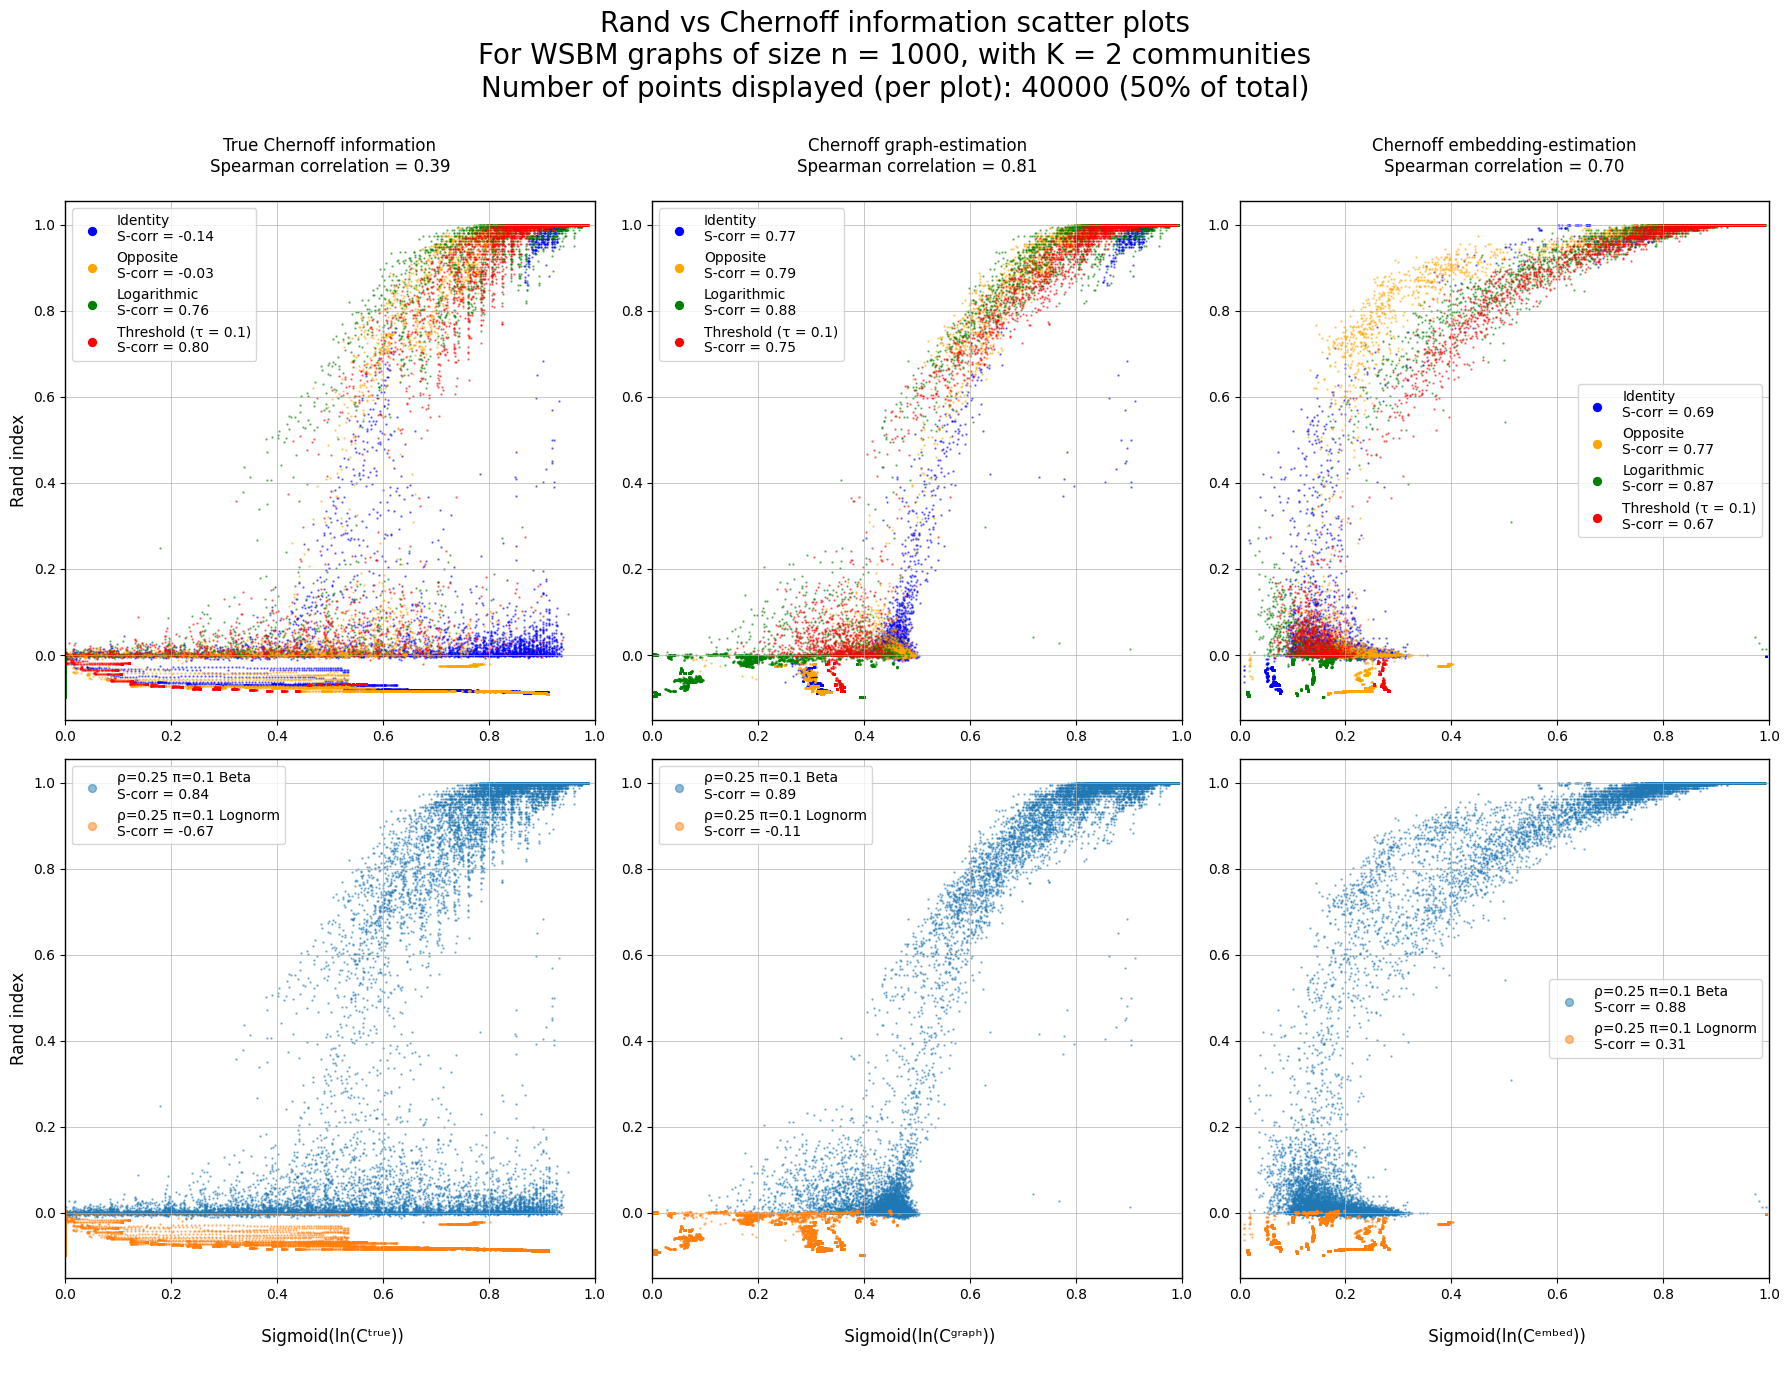

In [ ]:
# Widget (mode Transform, rho, pi, model)
# Sigmoid = True
# Transform, Rho, Pi, Model, RHO_PI_MODEL

plot_scatter_Rand_vs_Chernoff(metrics, n_points_ratio_displayed=0.5)

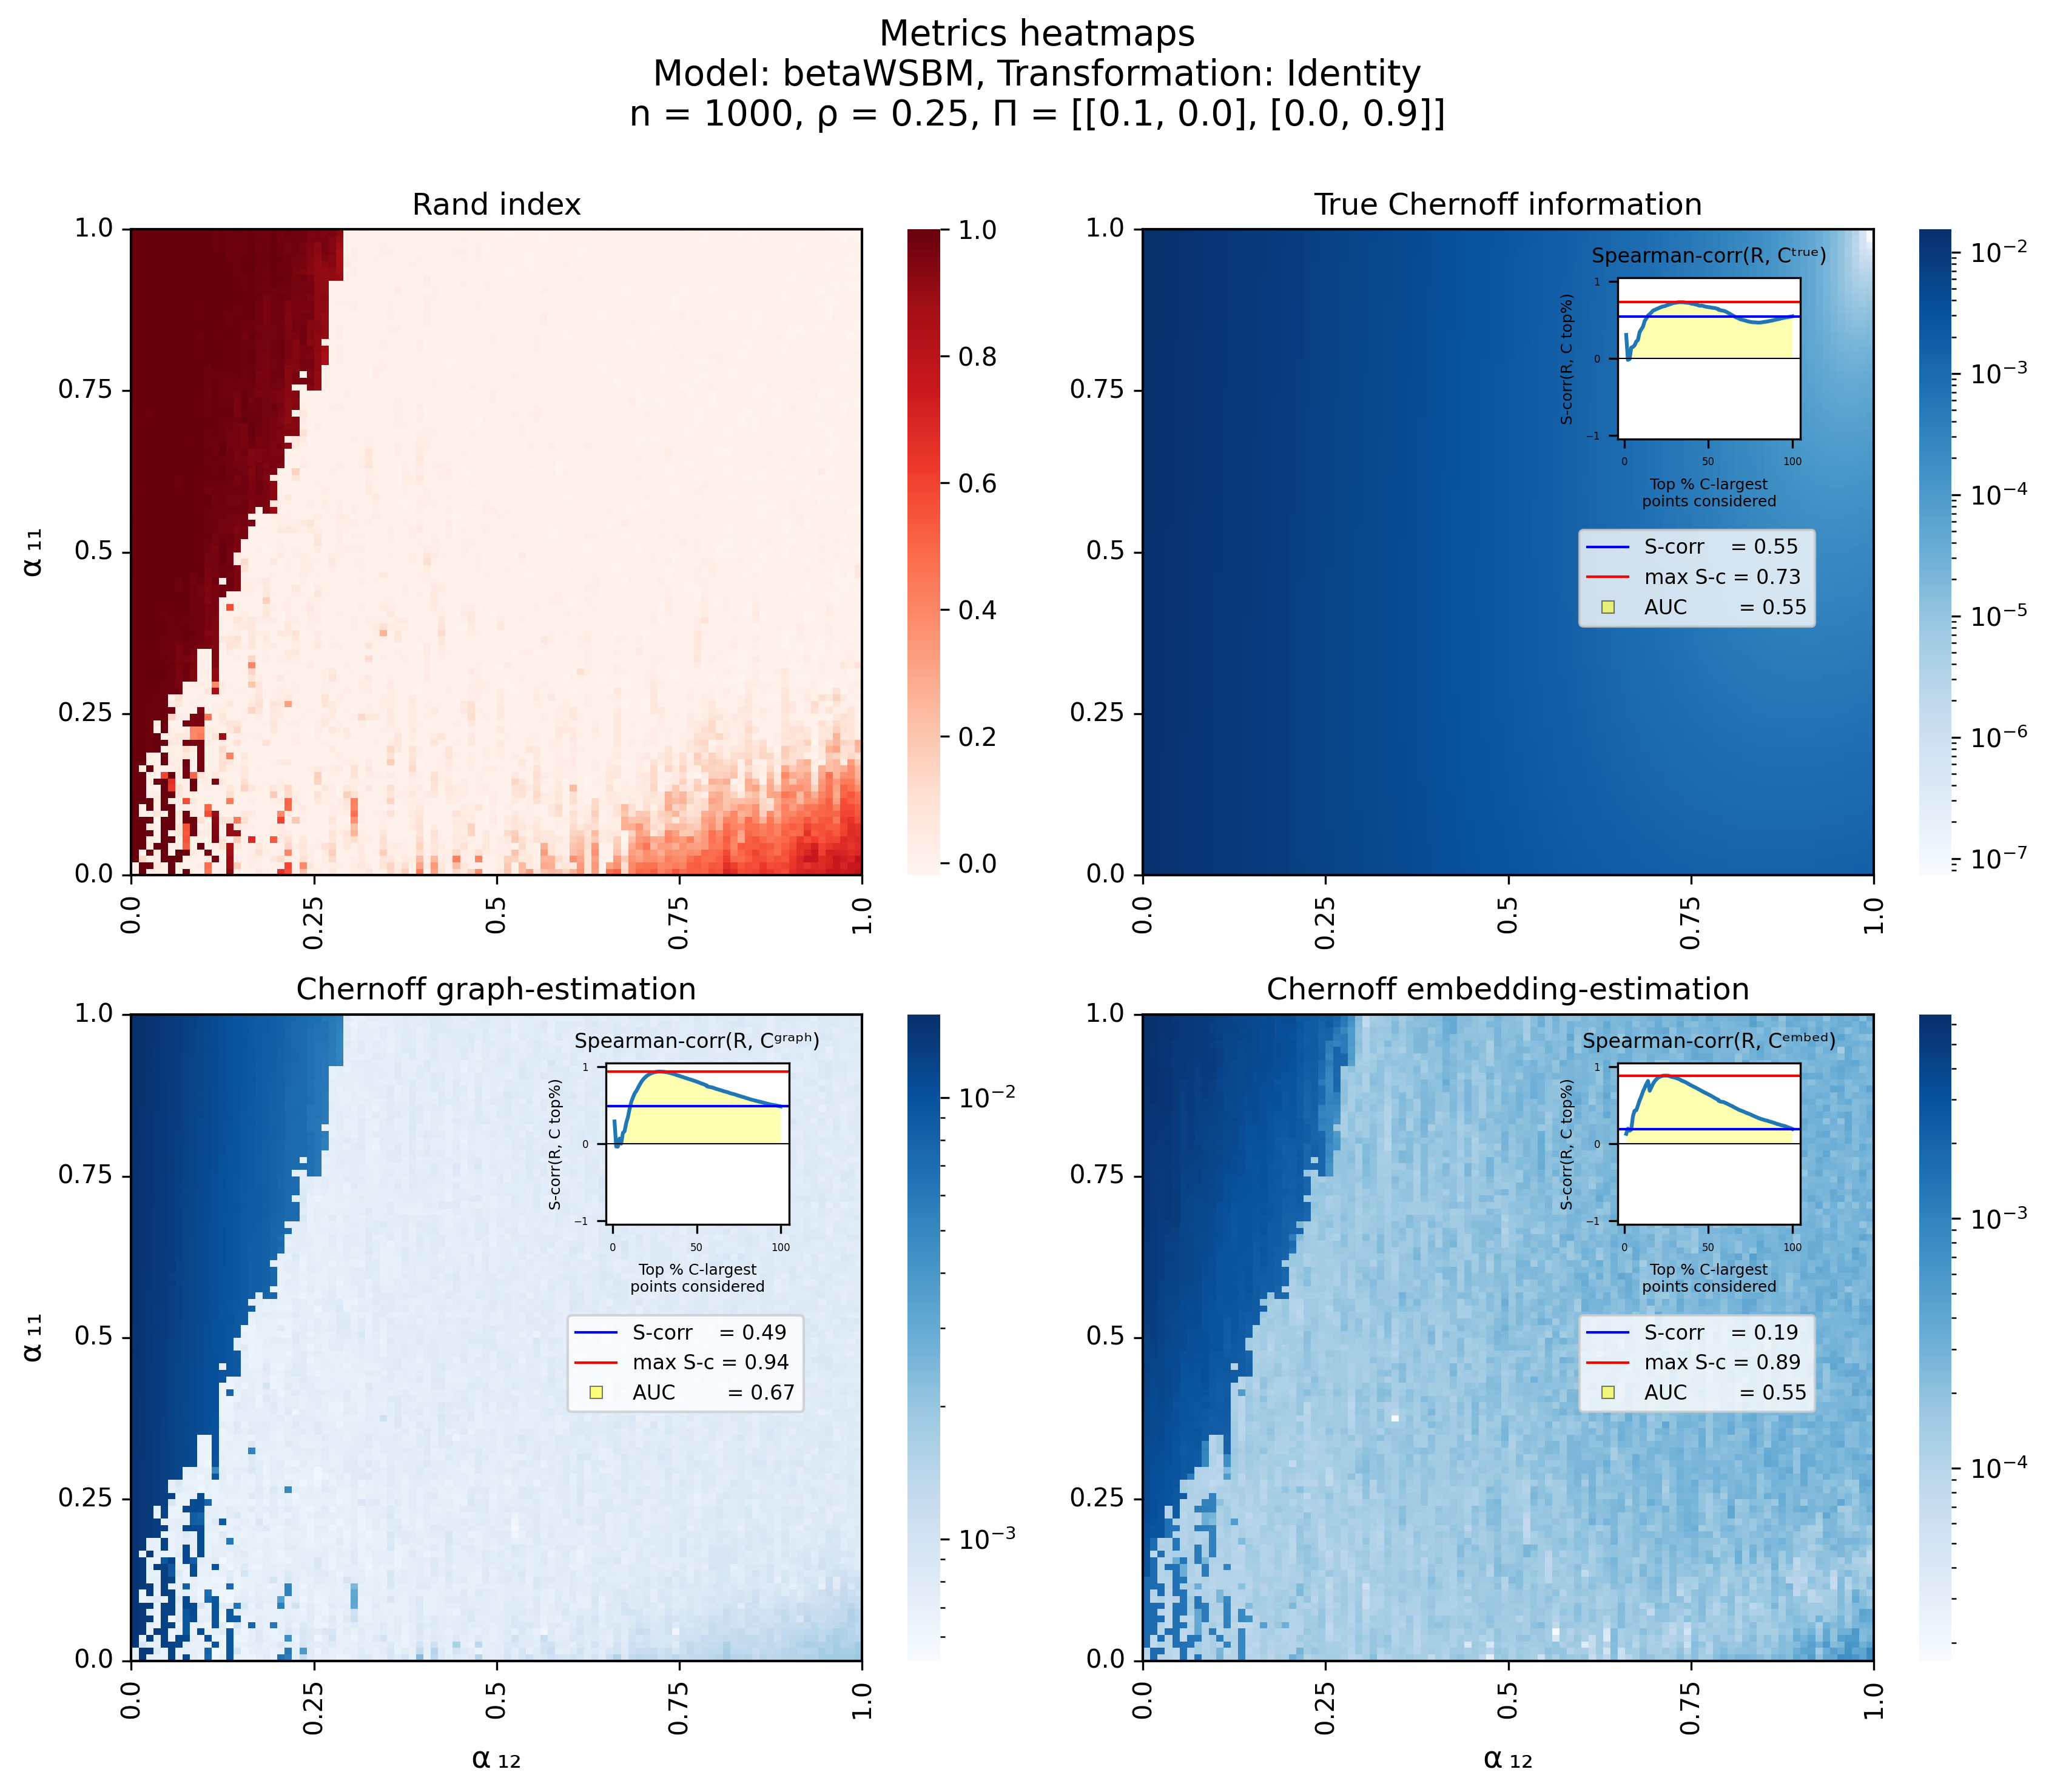

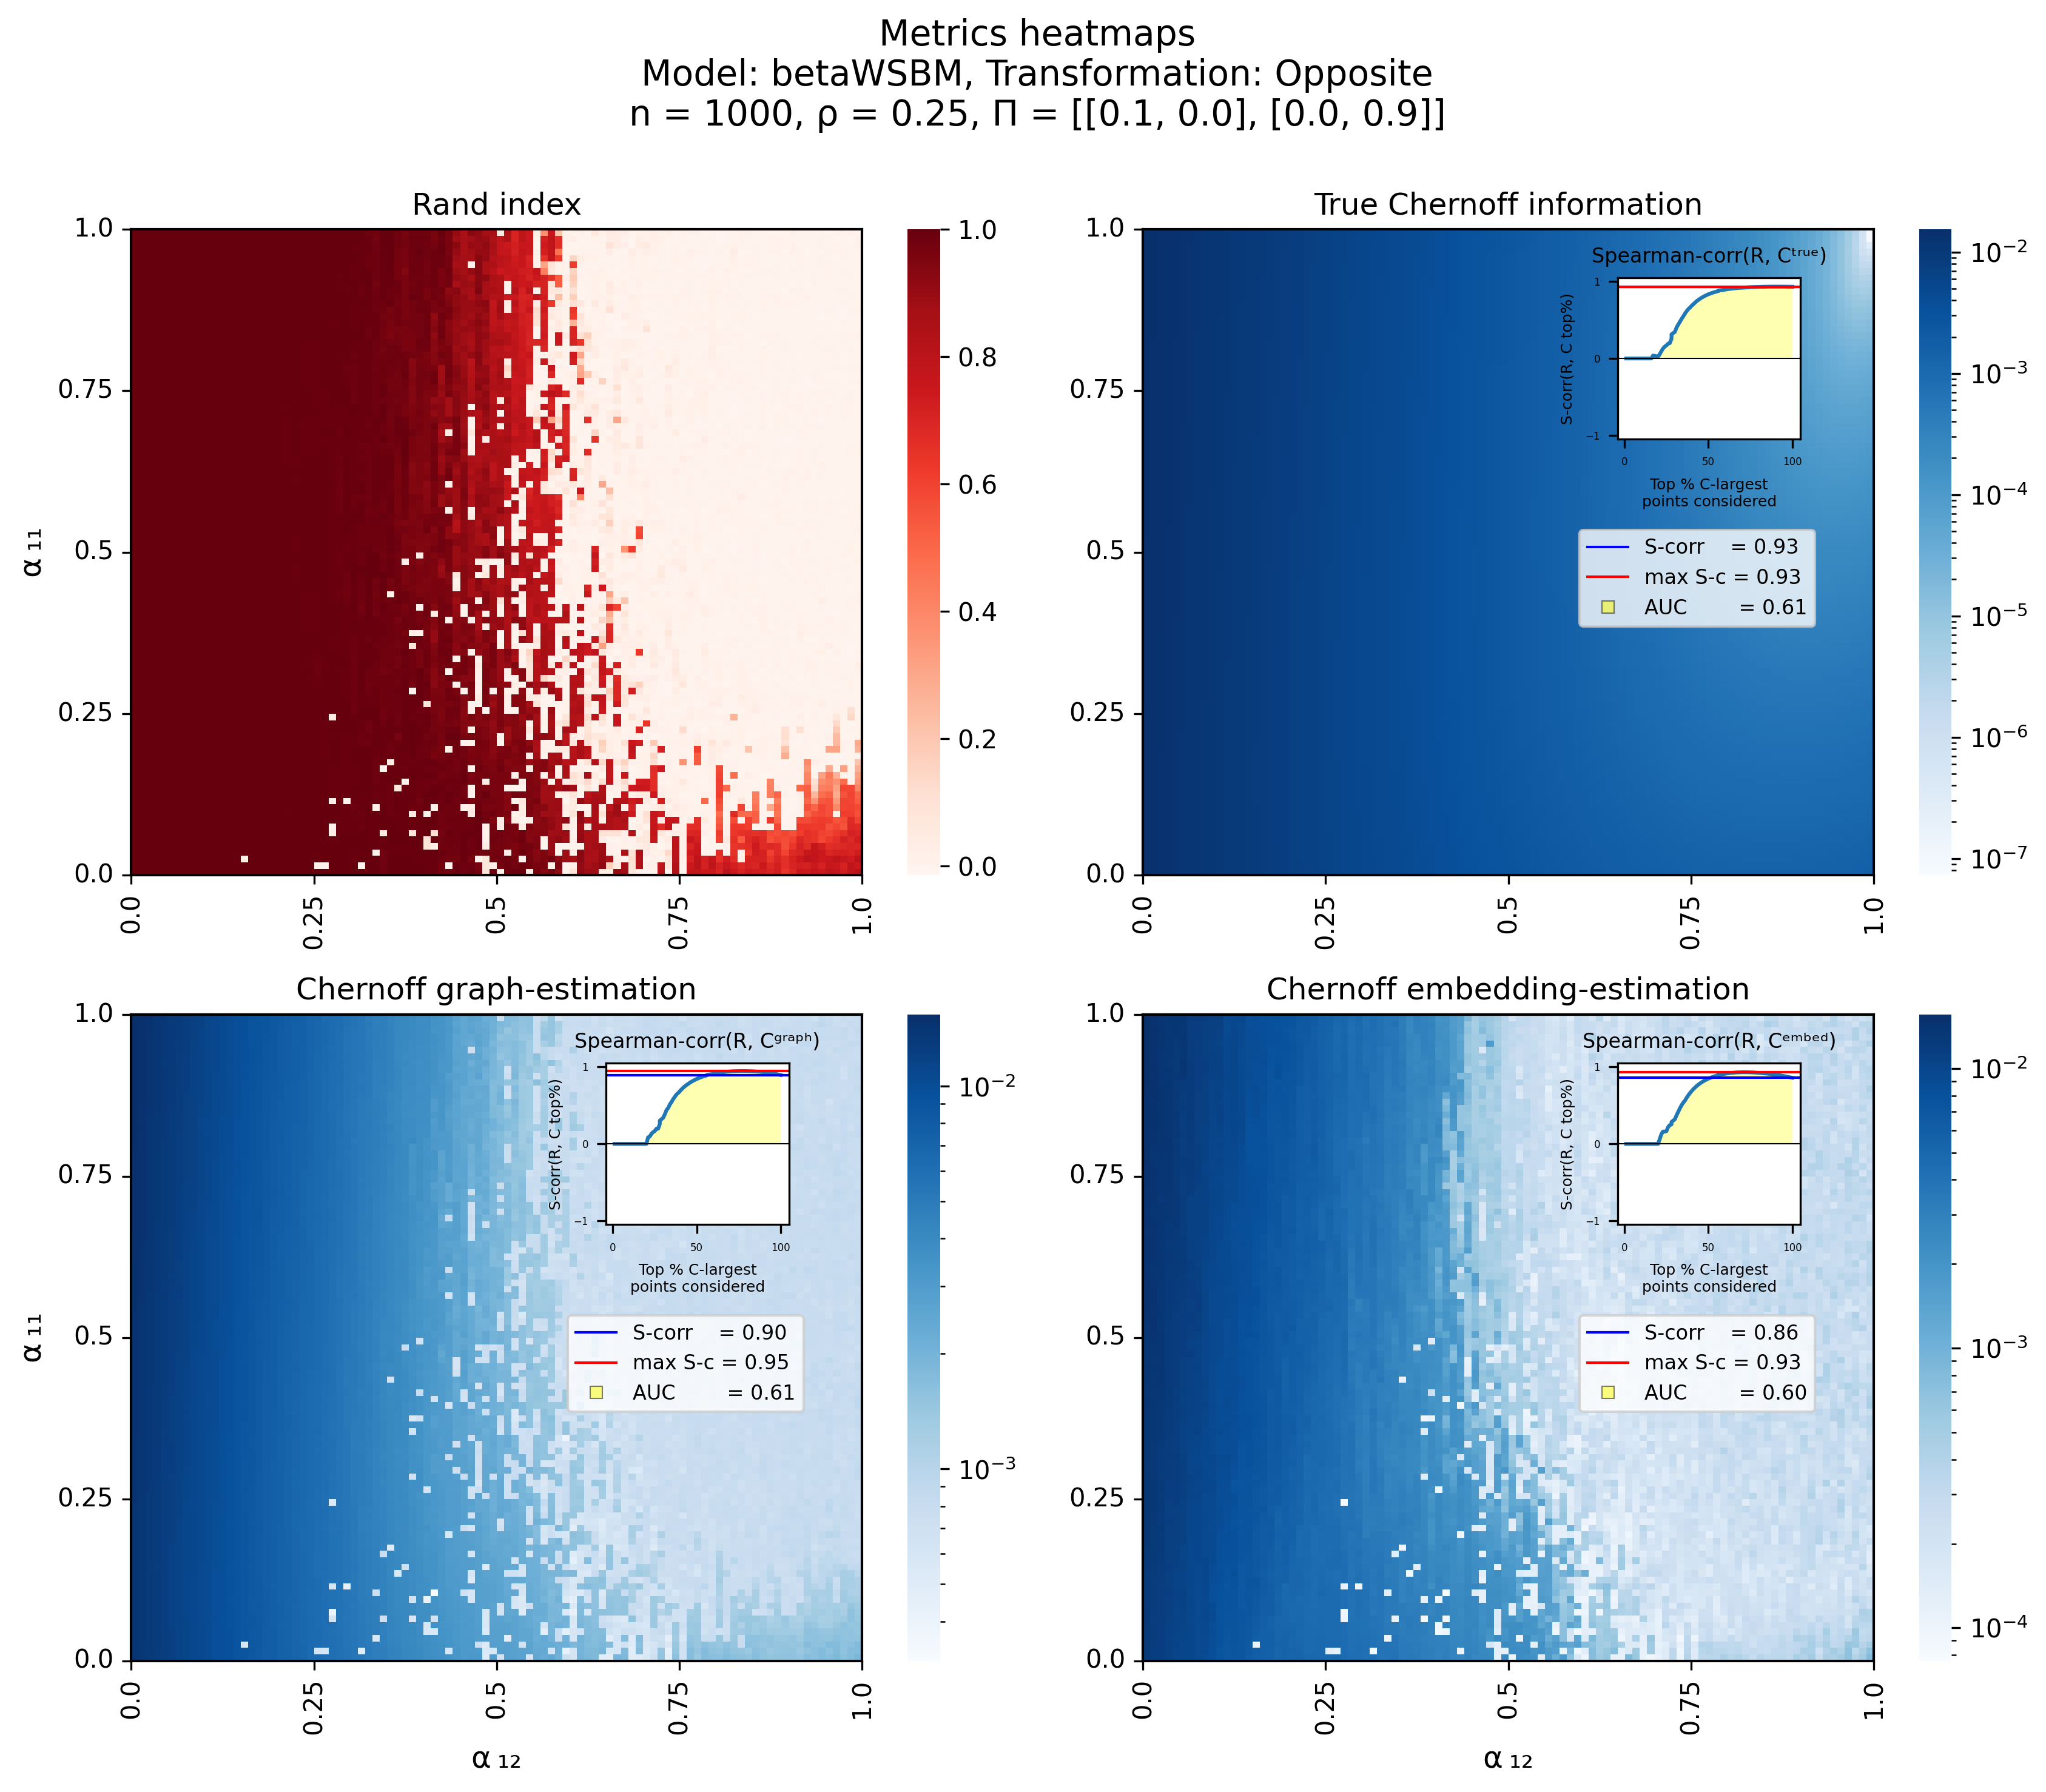

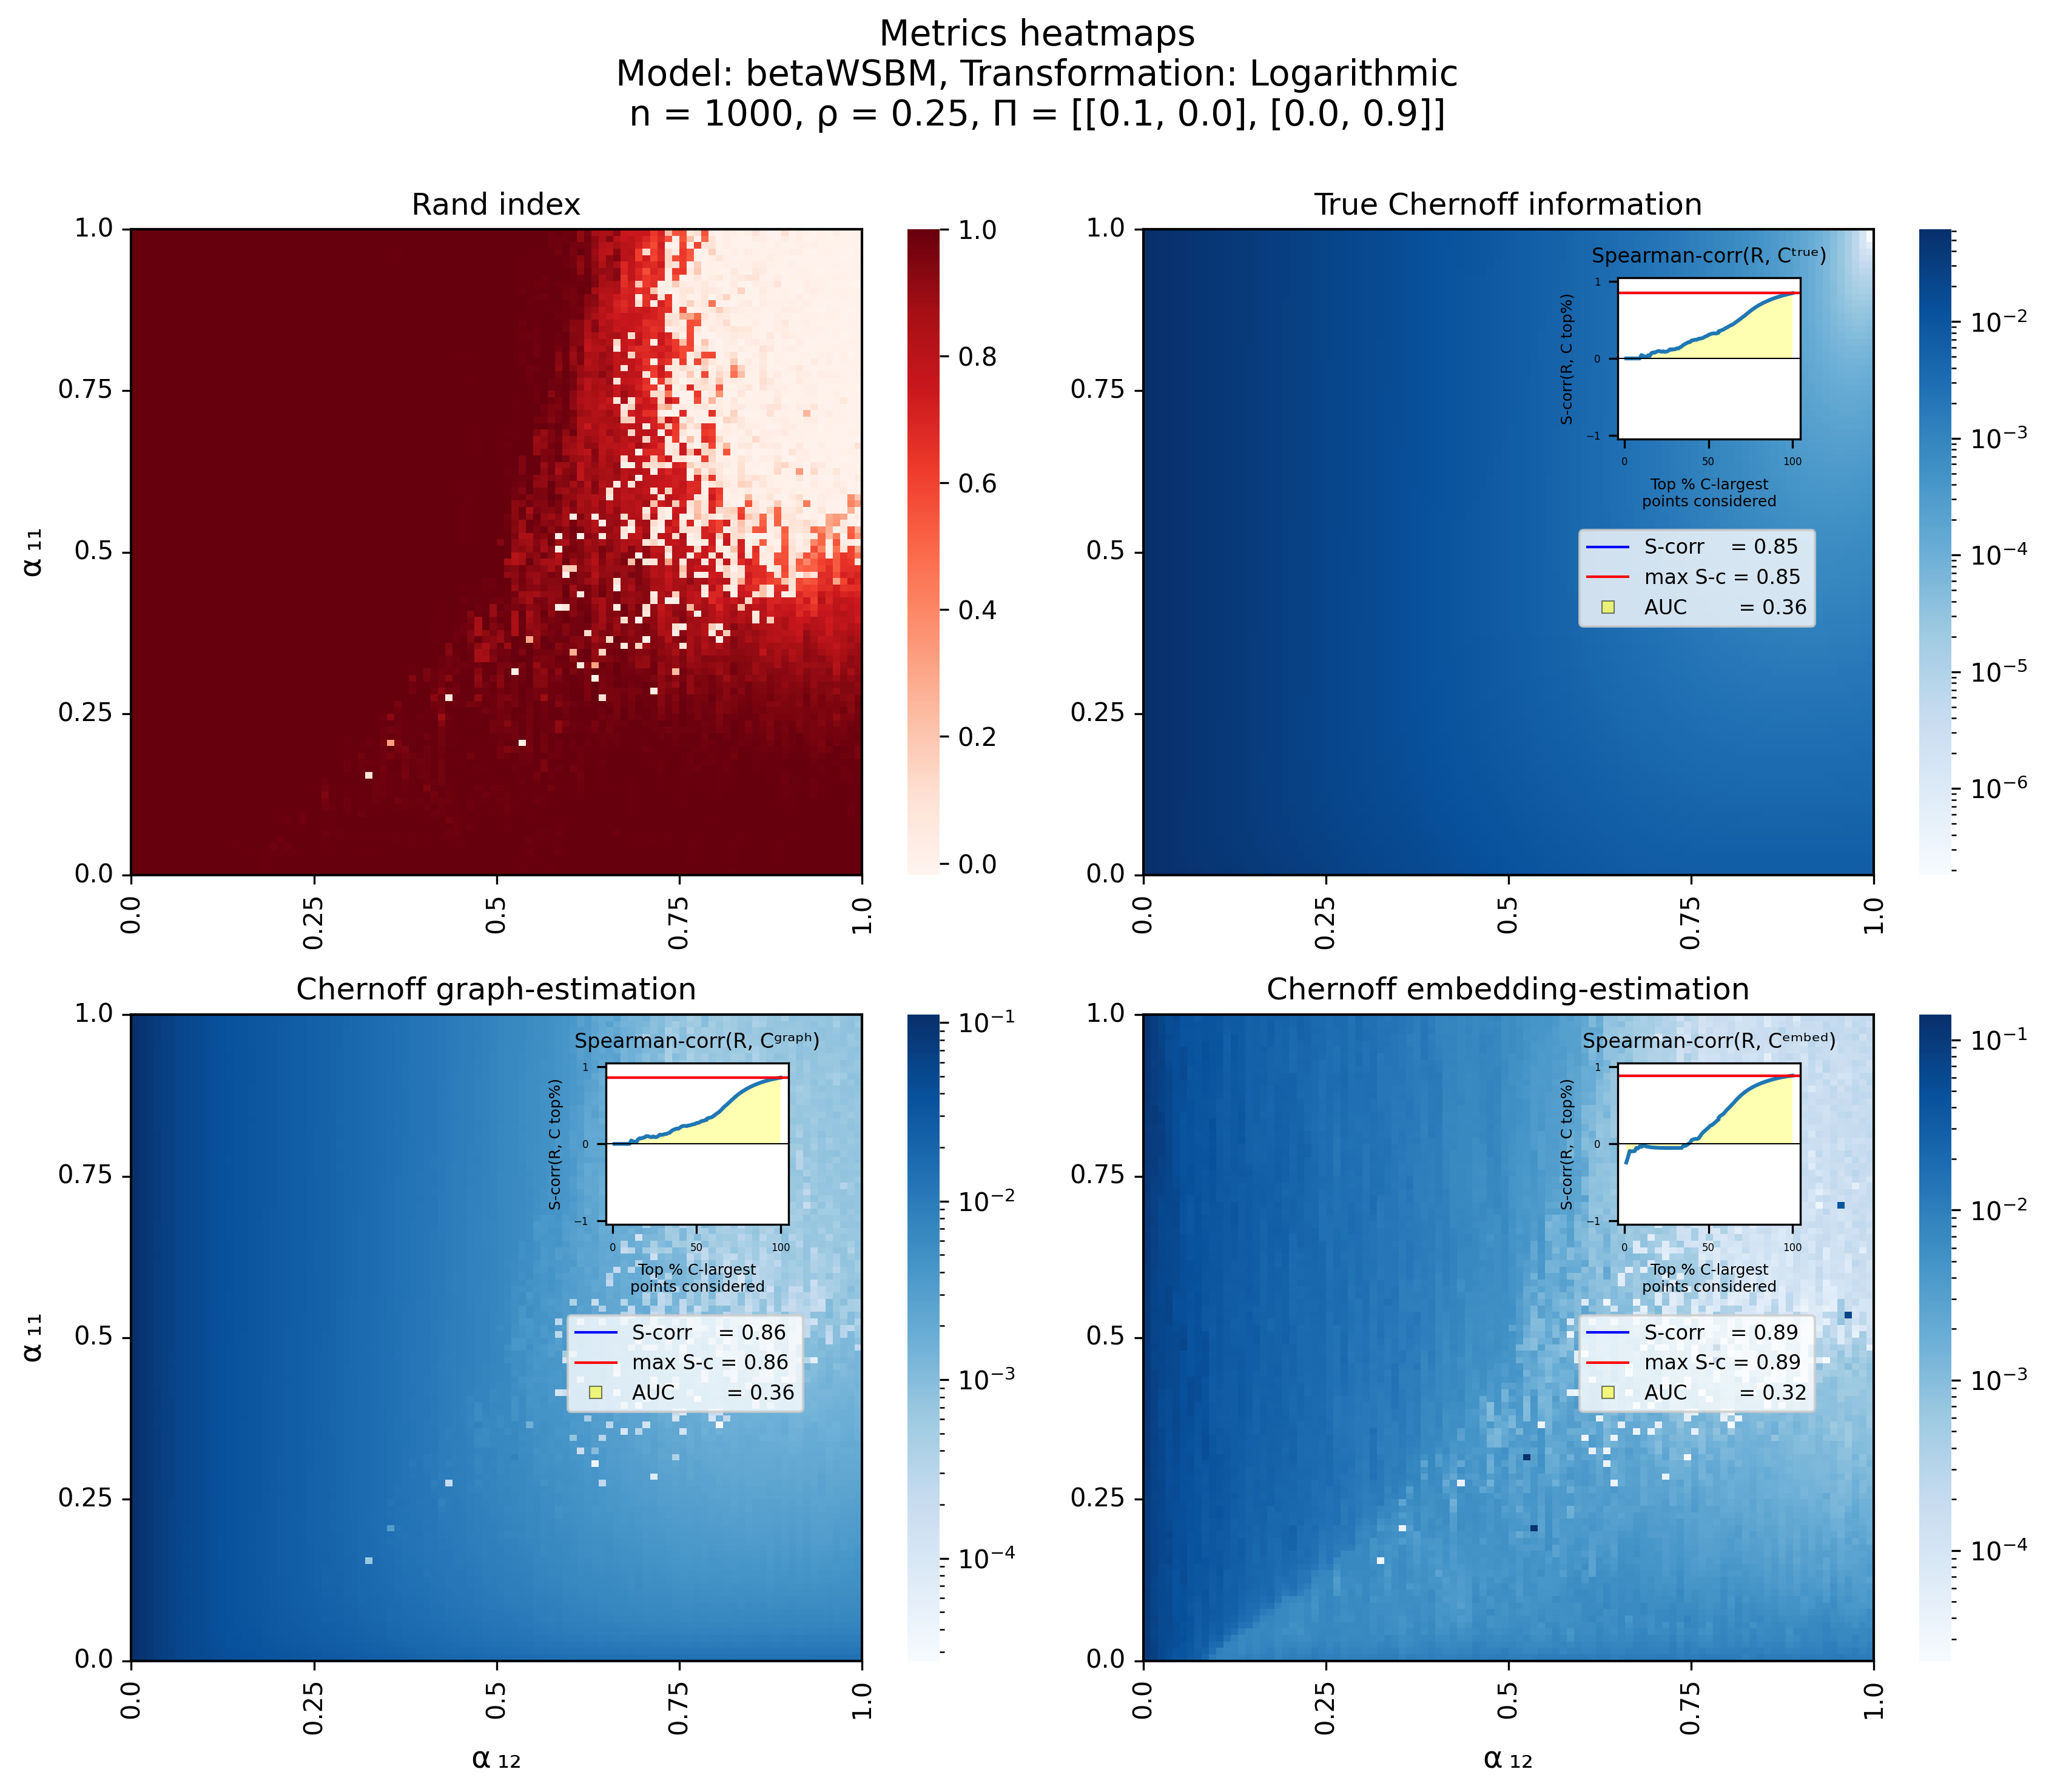

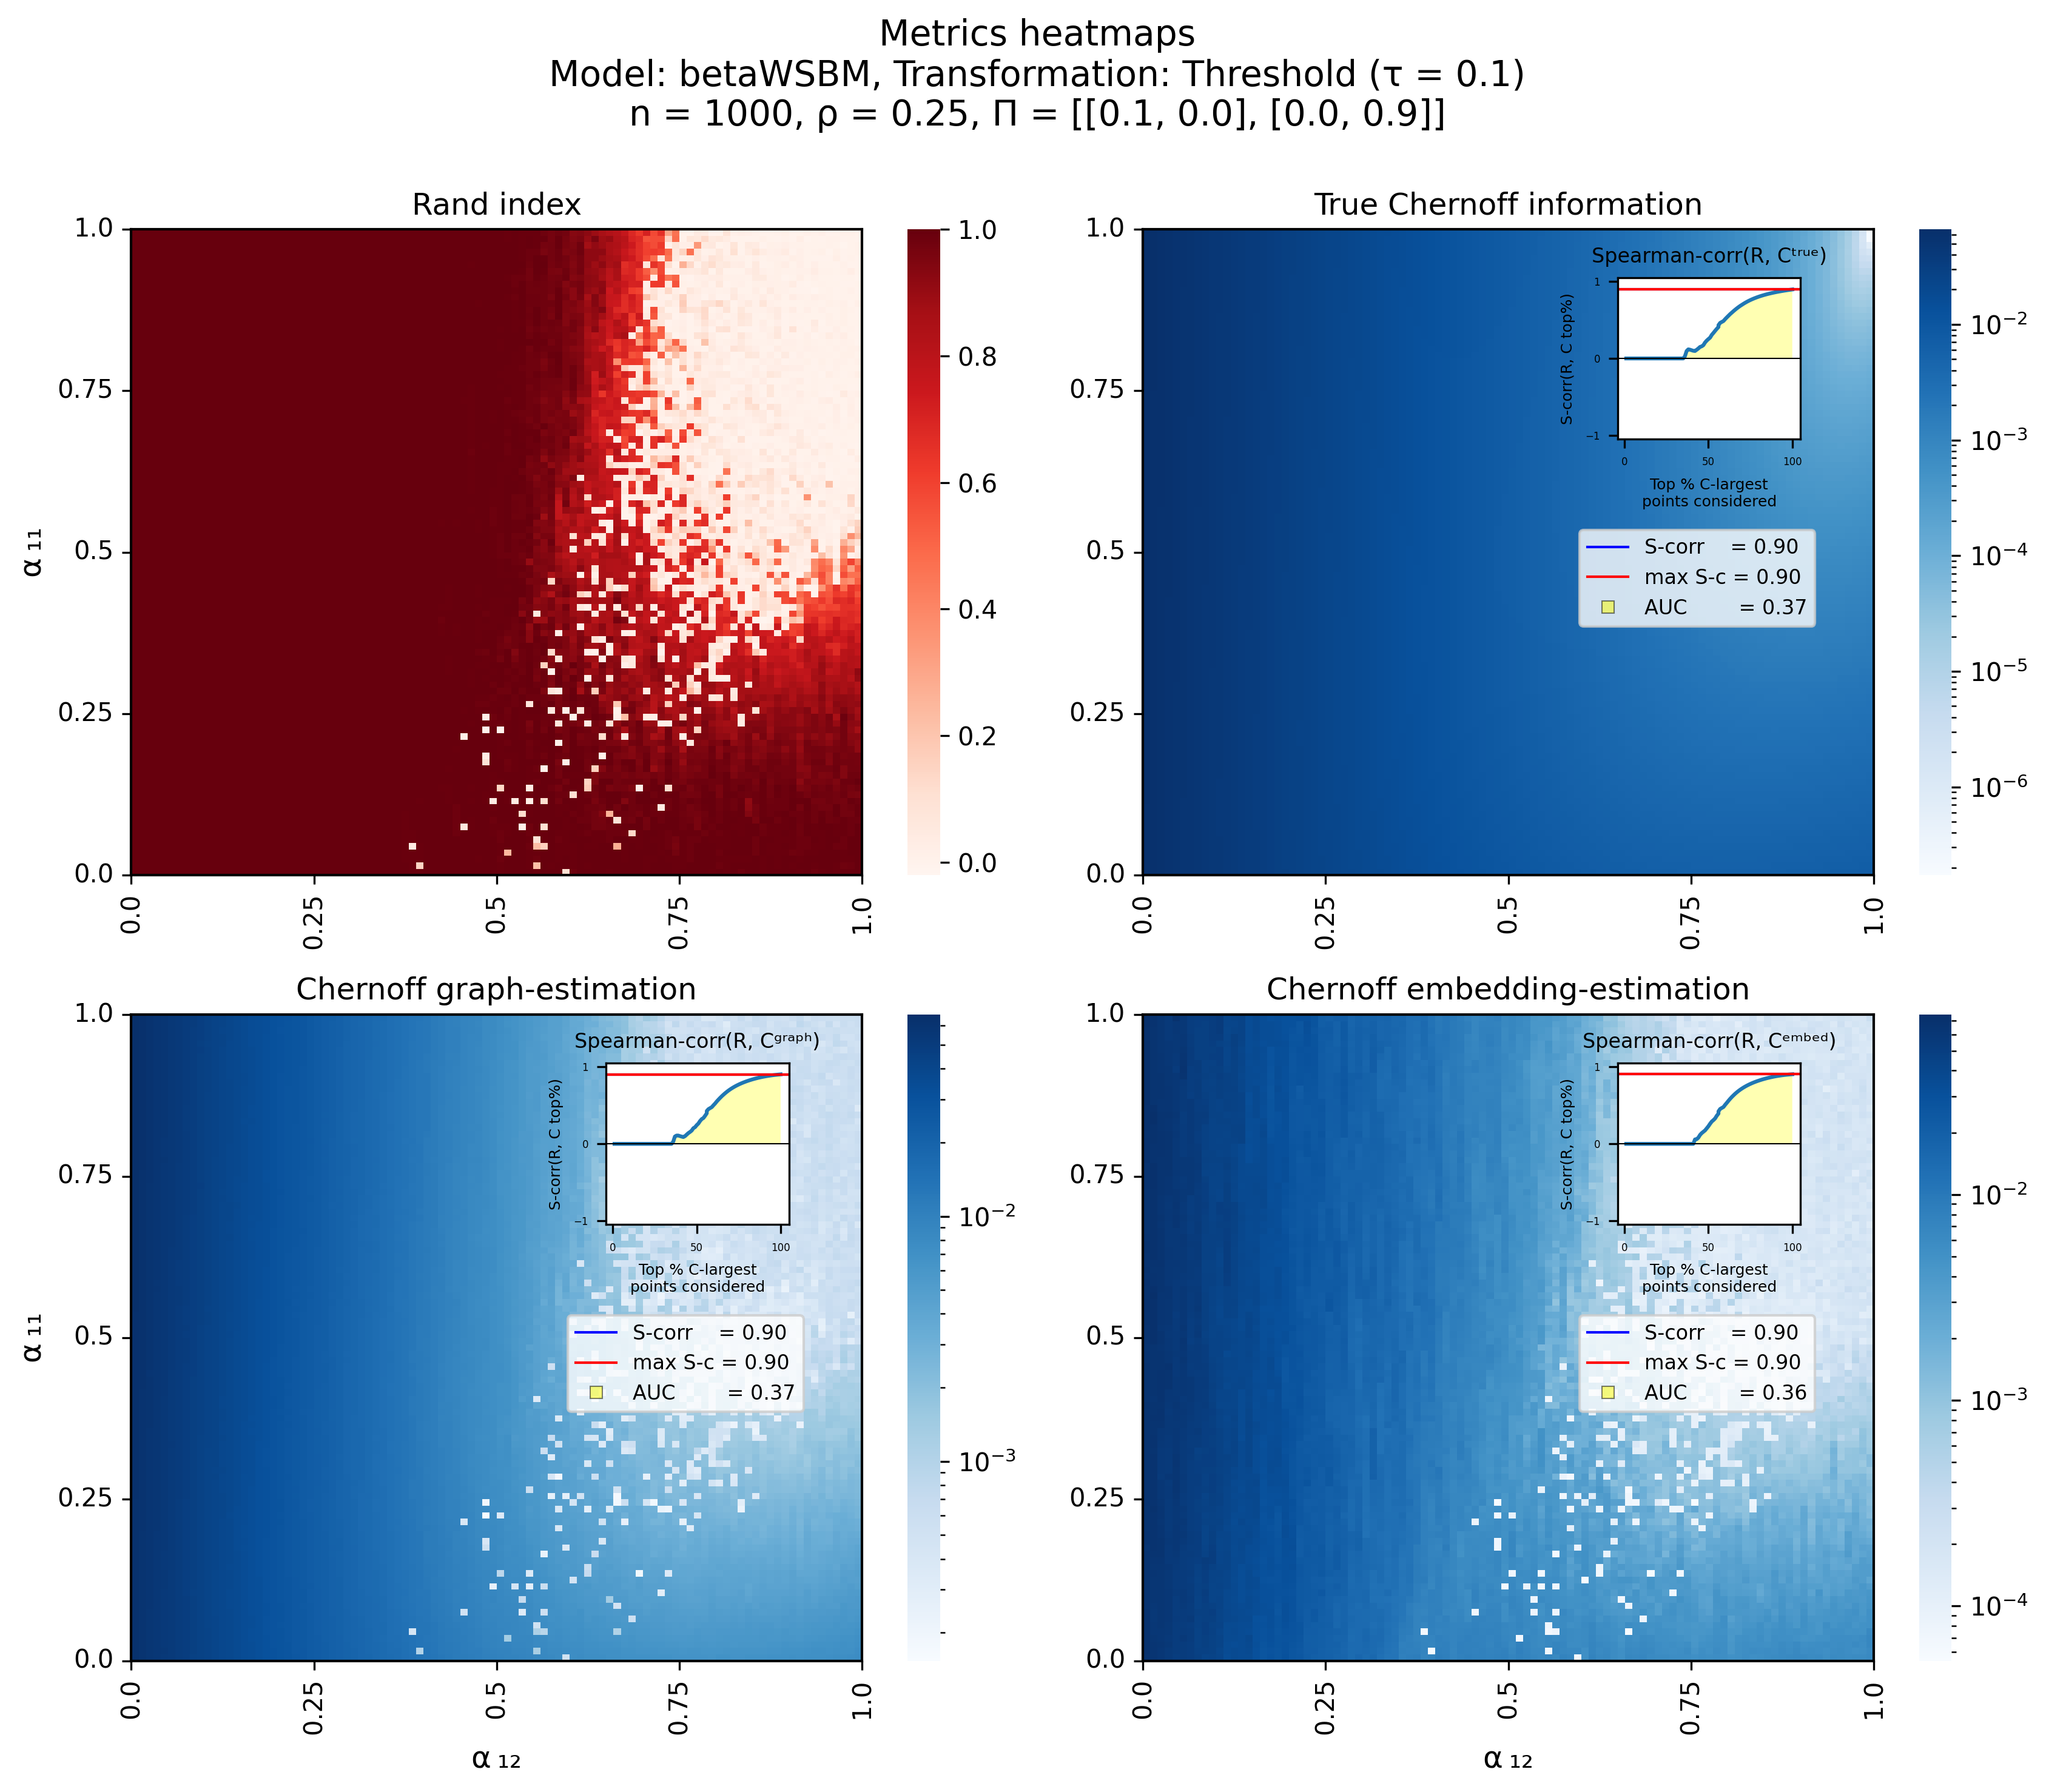

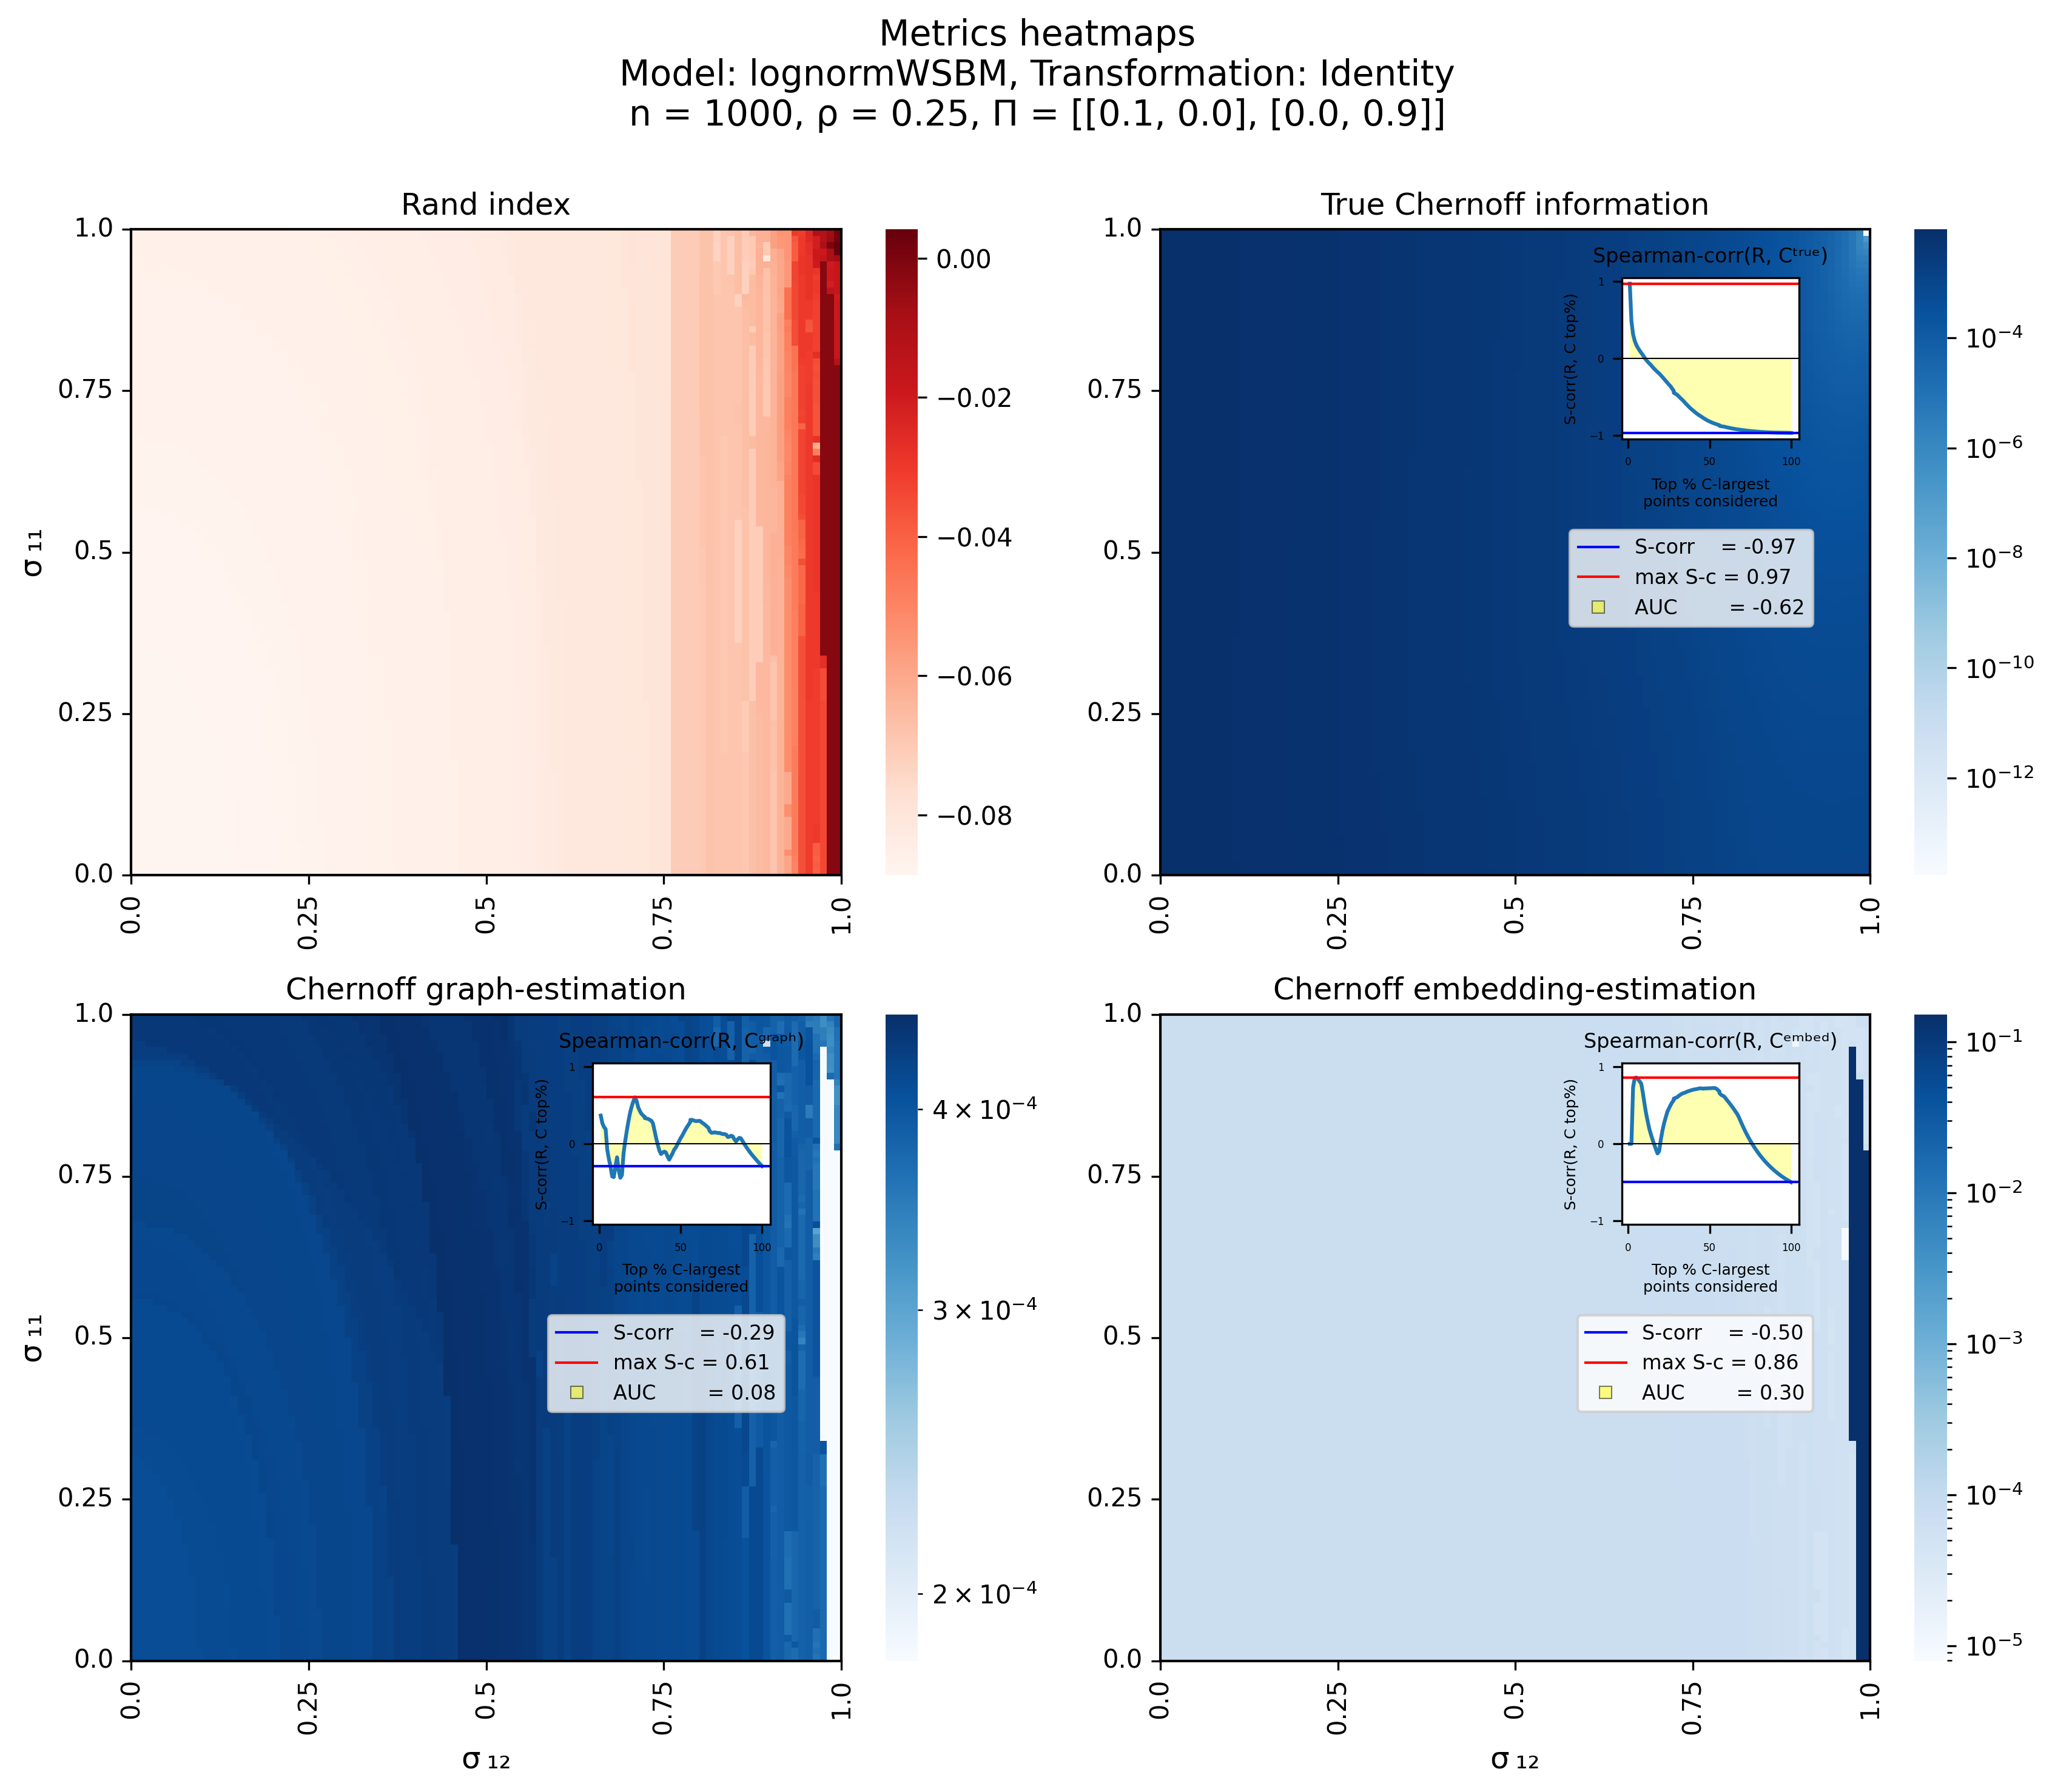

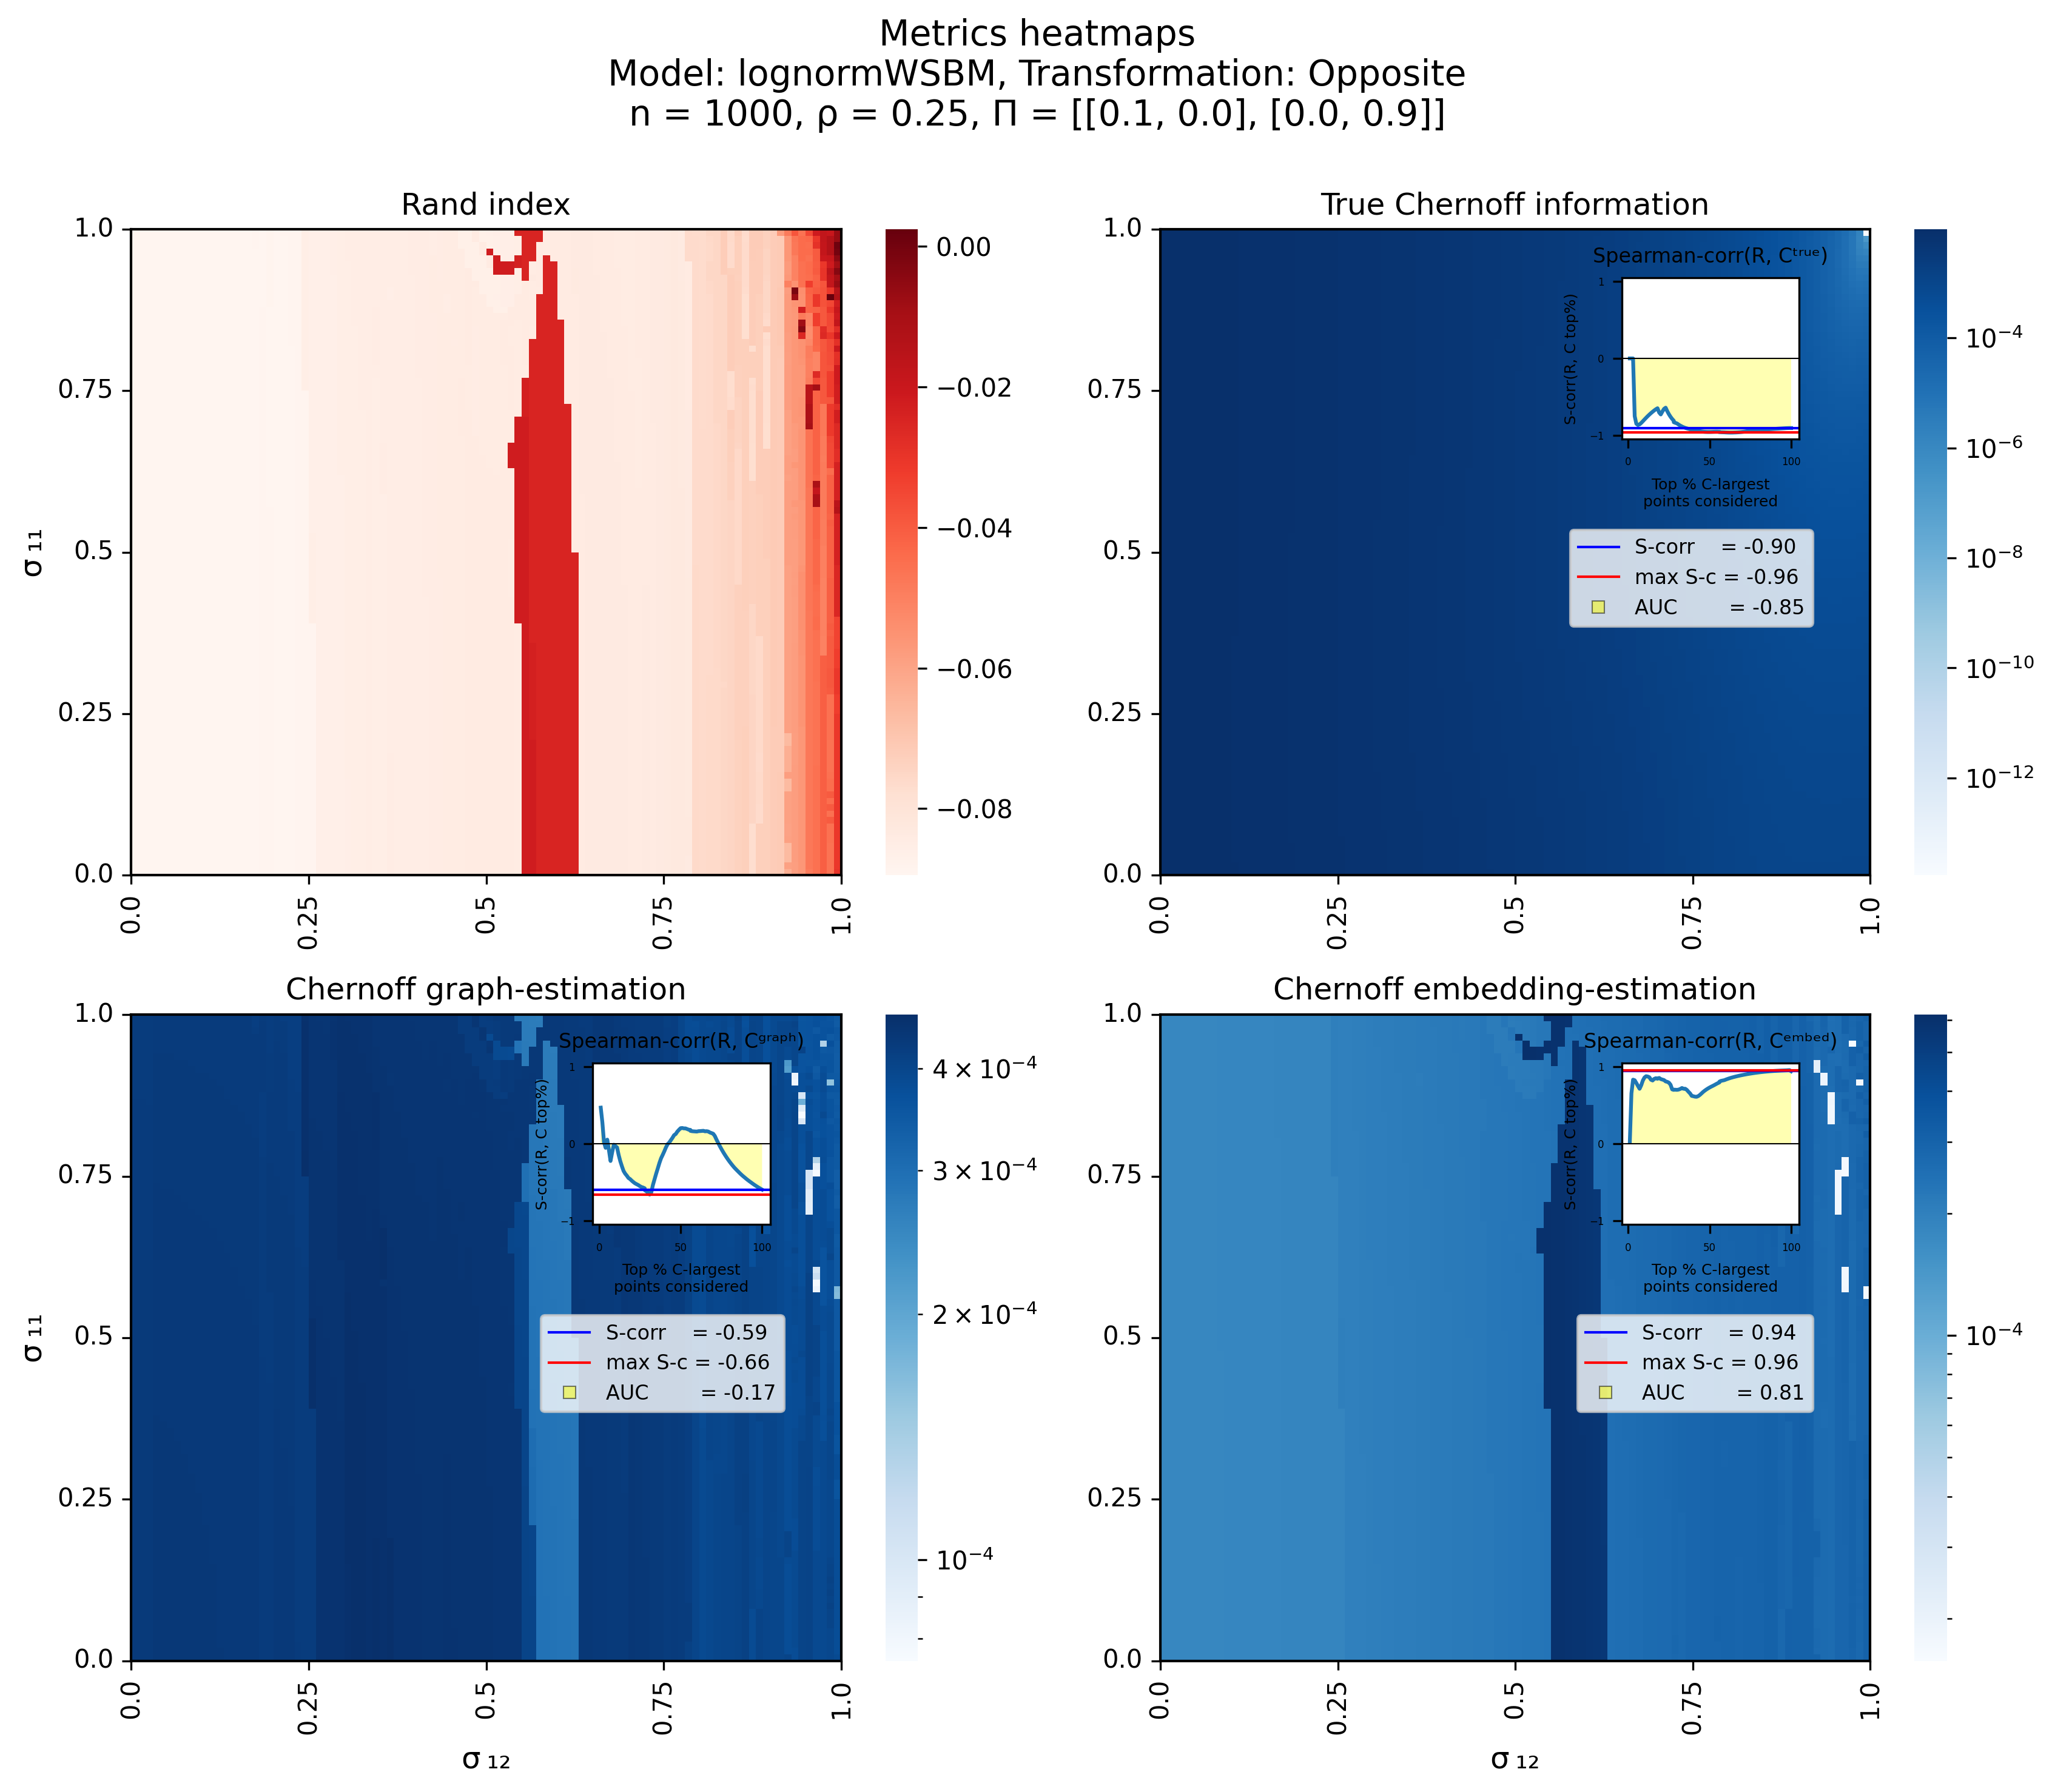

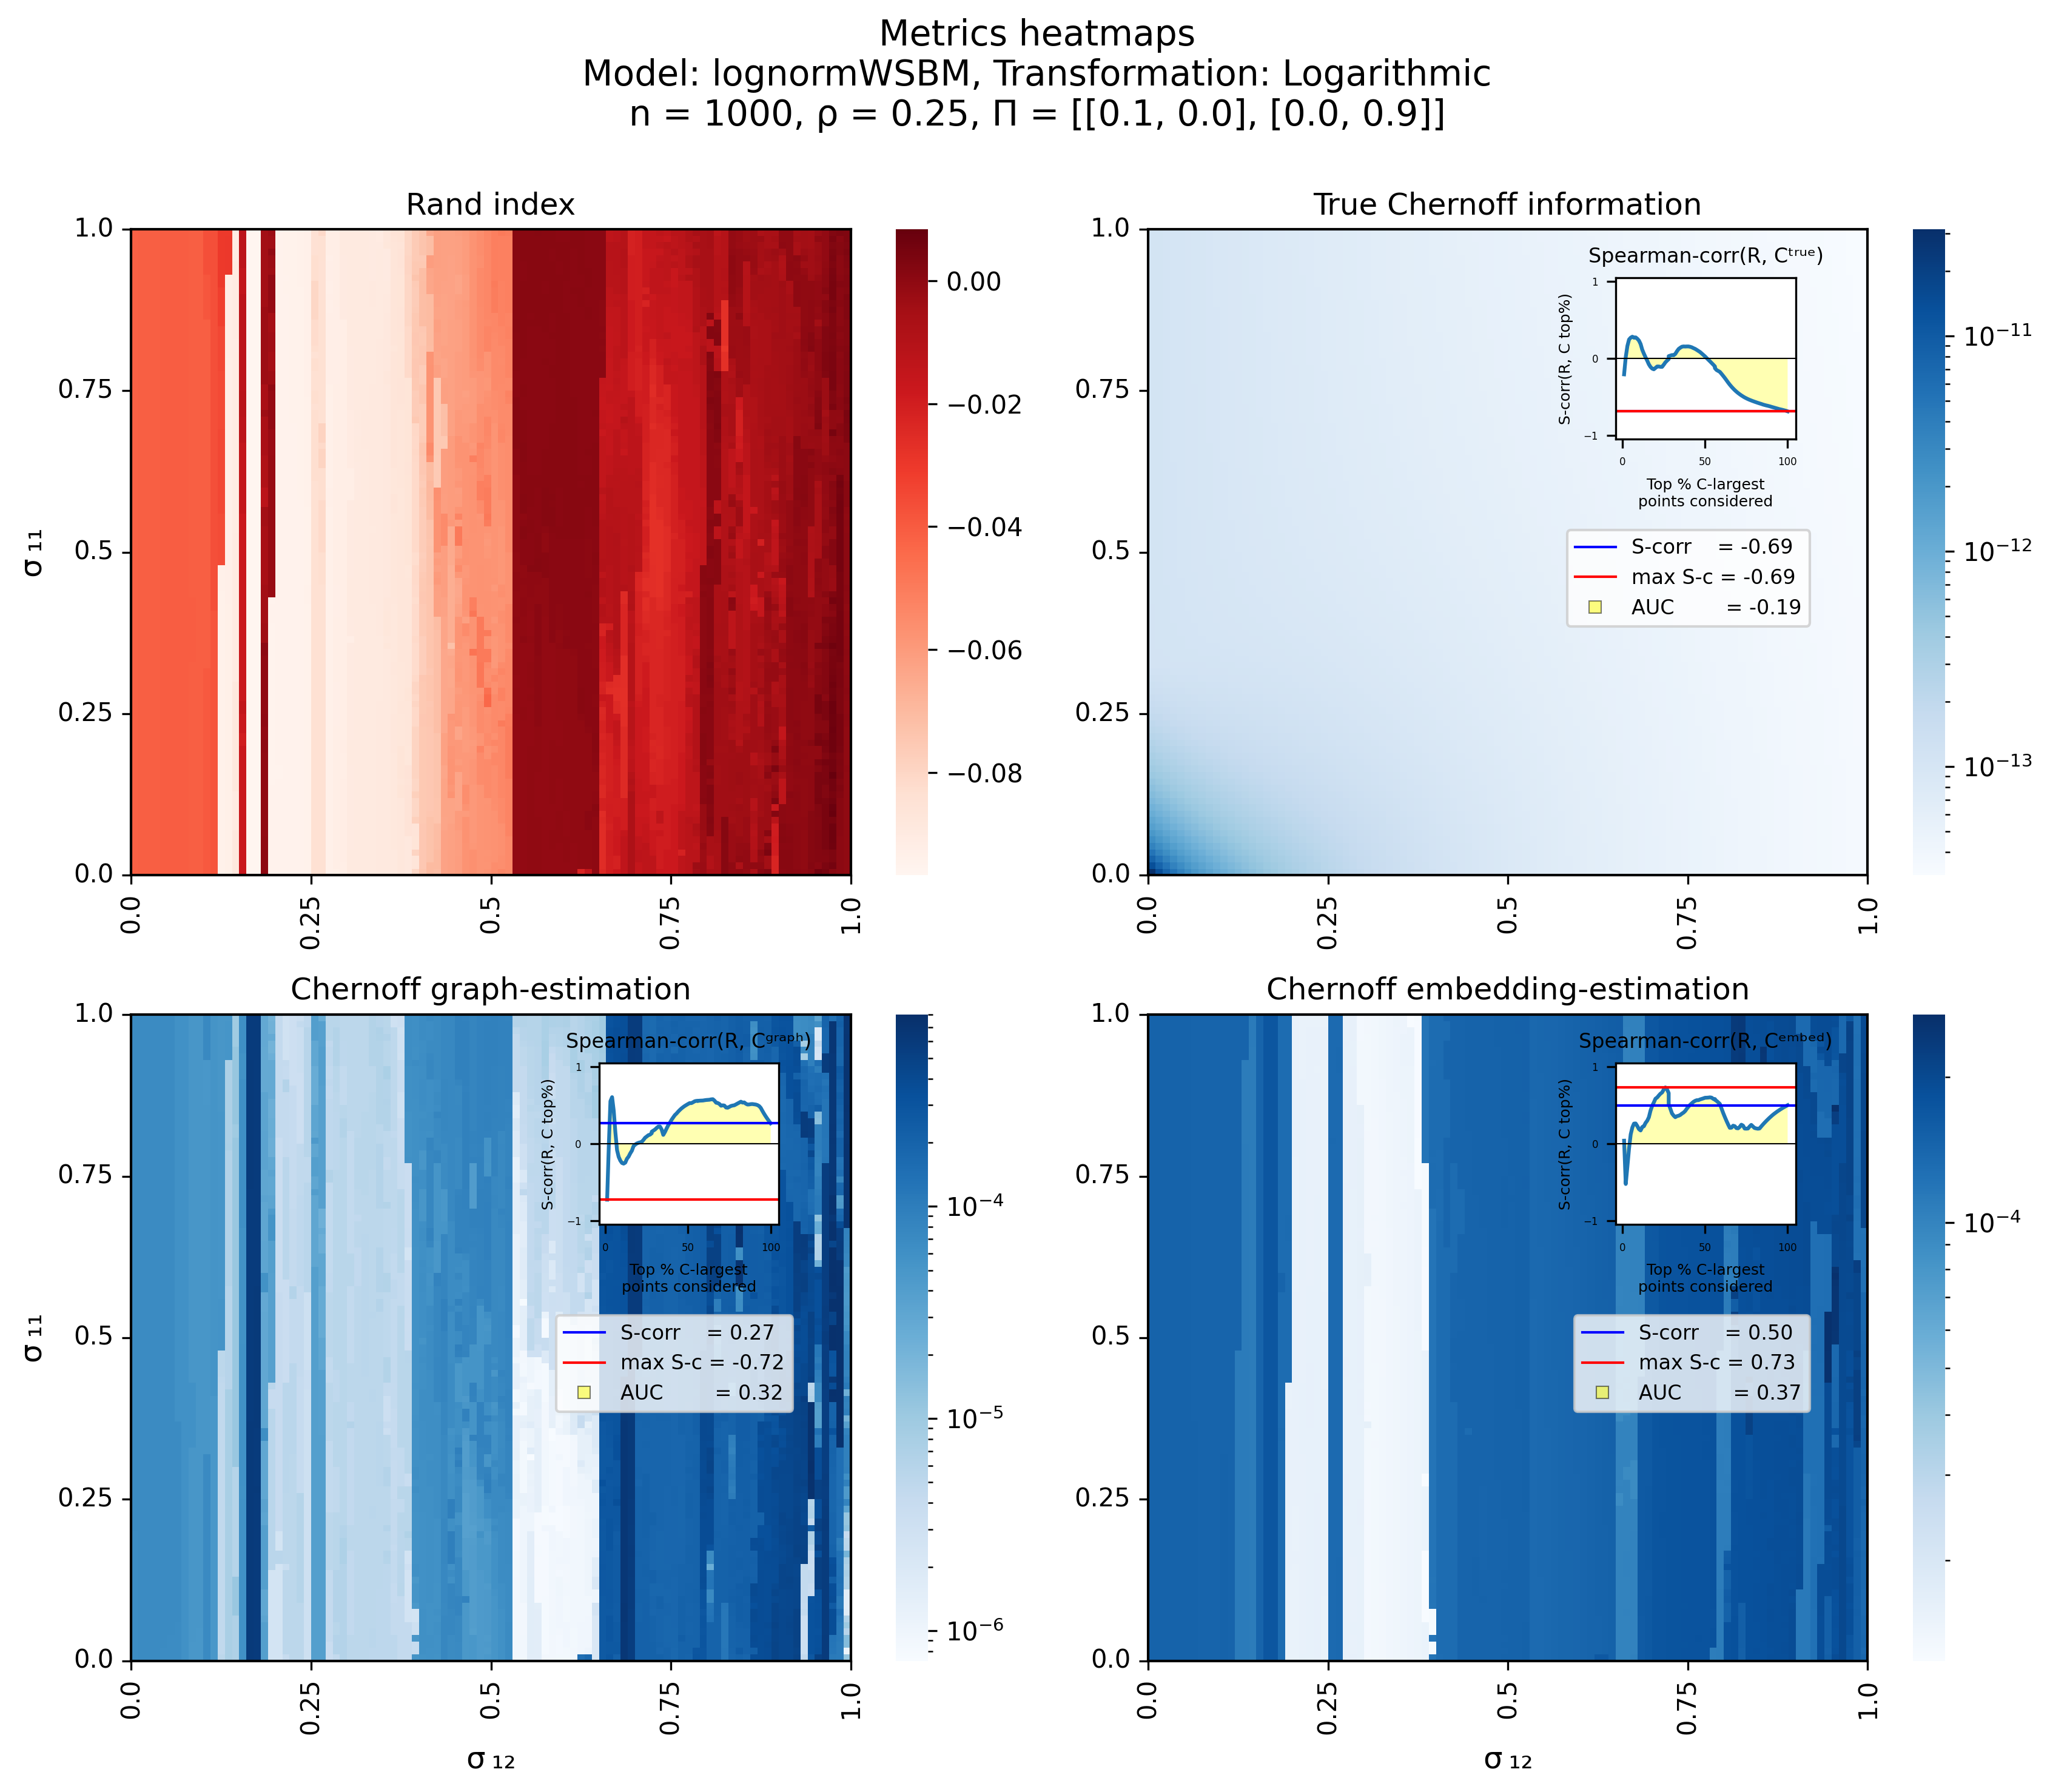

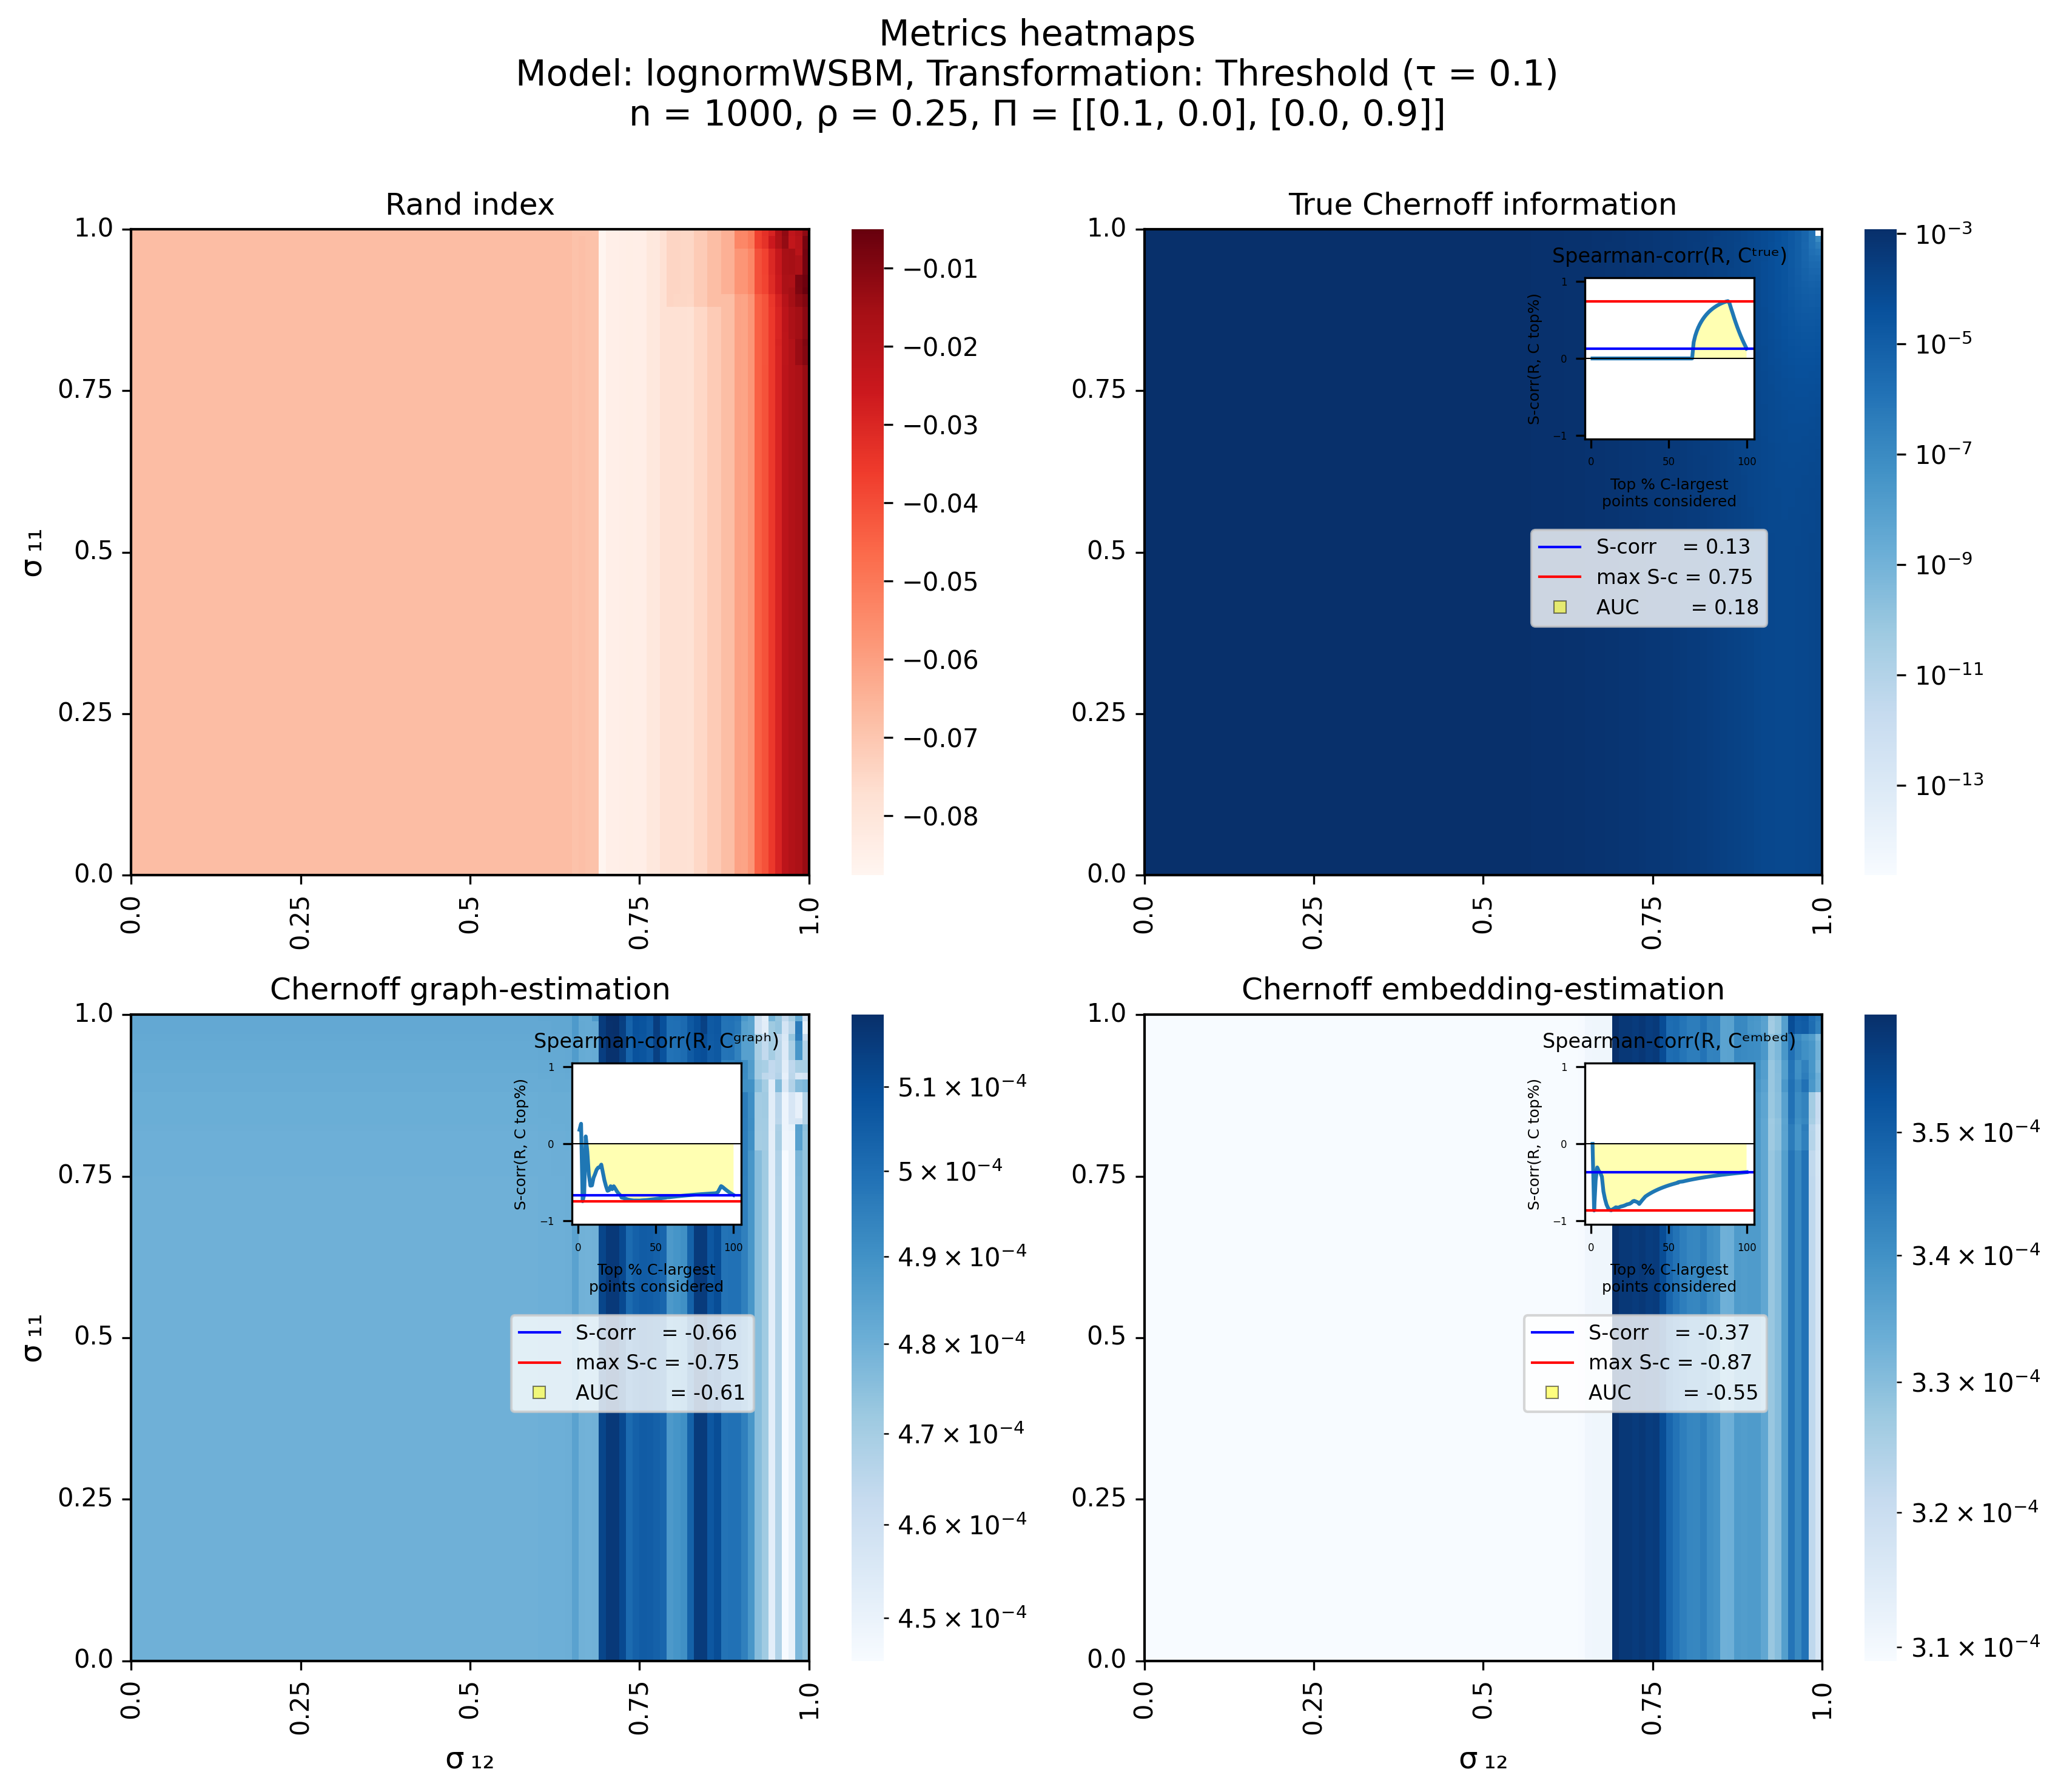

In [ ]:
for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics[(rho, pi, model)]
	for t in TRANSFORMS:
		m = metrics[(rho, pi, model)][t]
		plot_metrics_heatmap(rho, pi, model, t, m, shared=False, log=True)

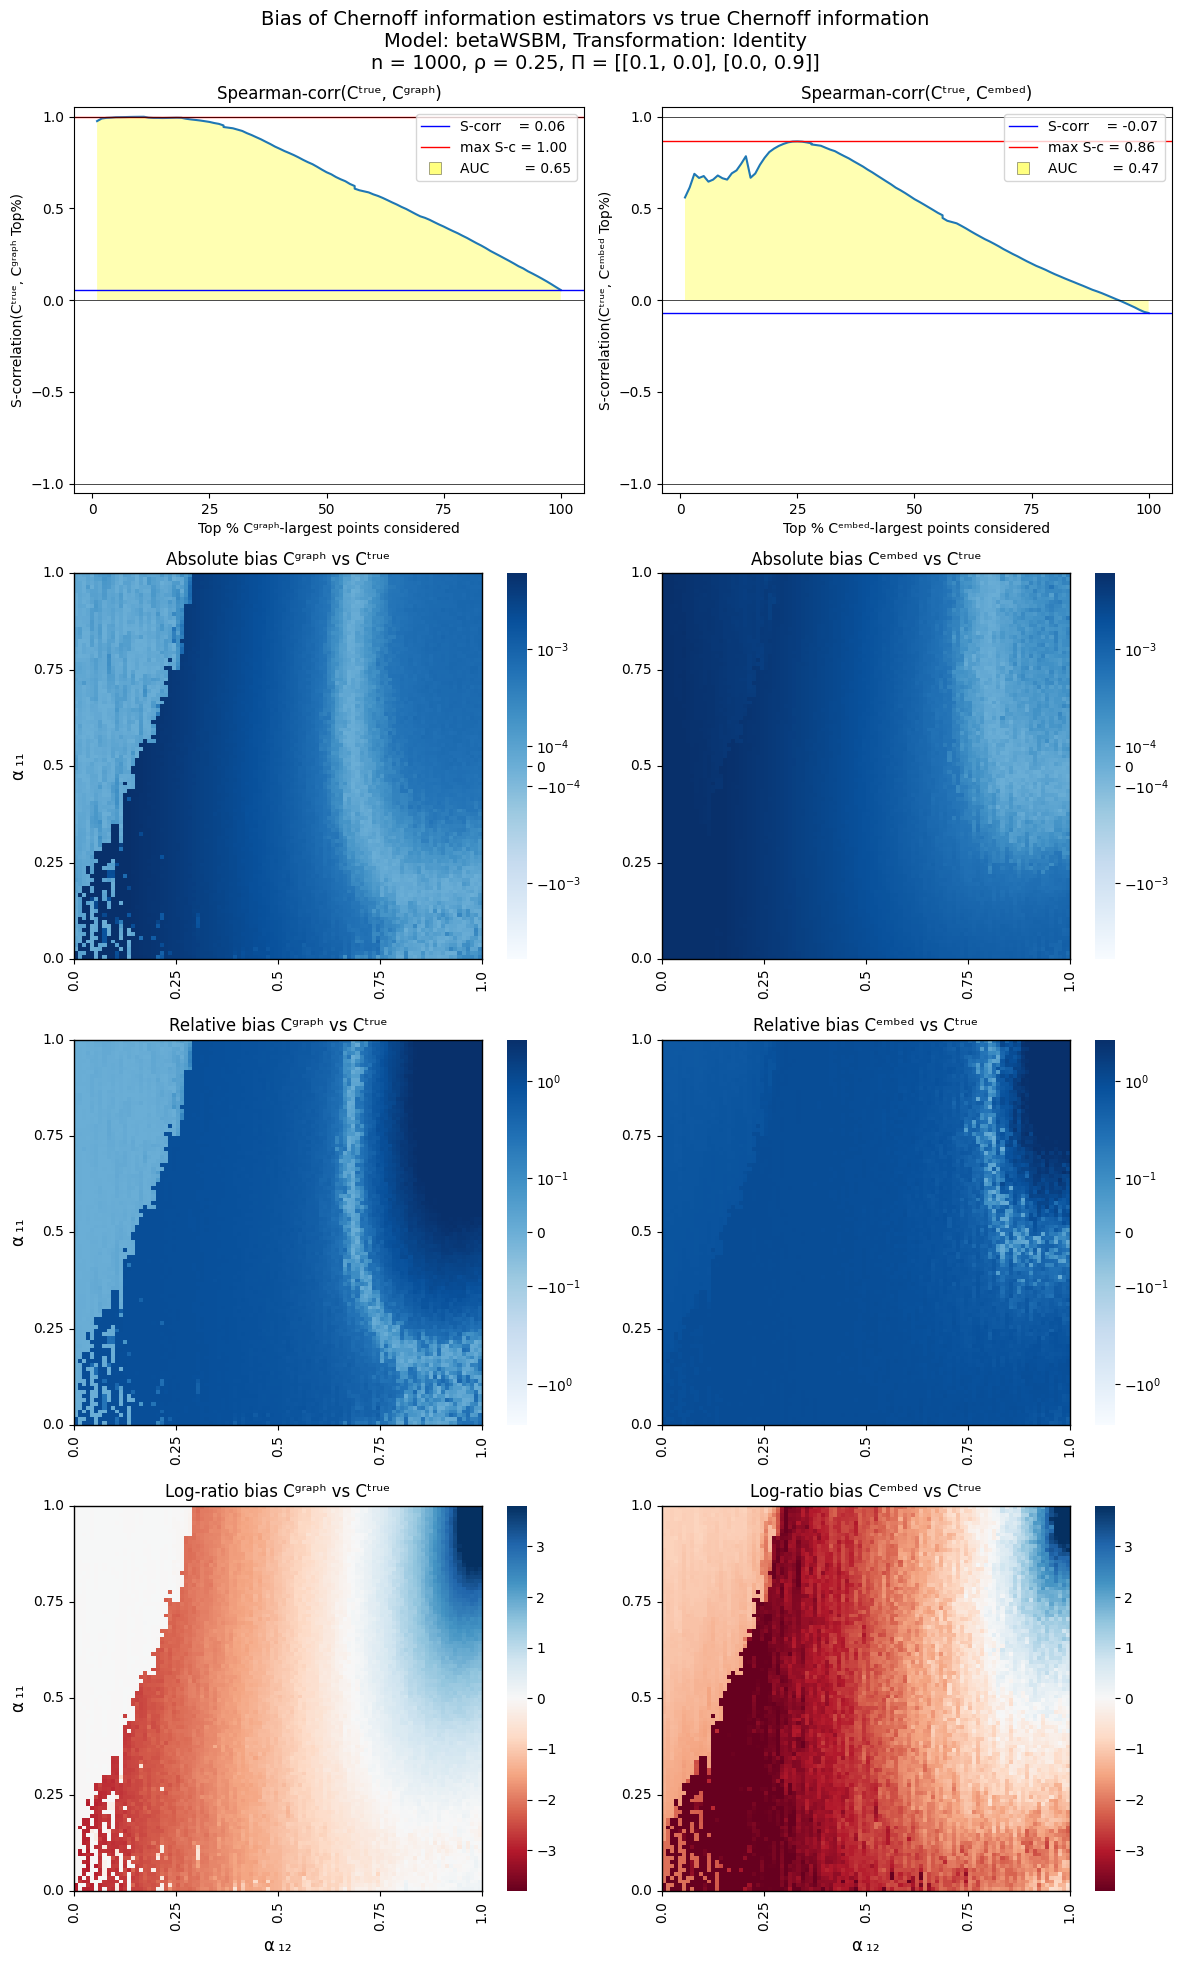

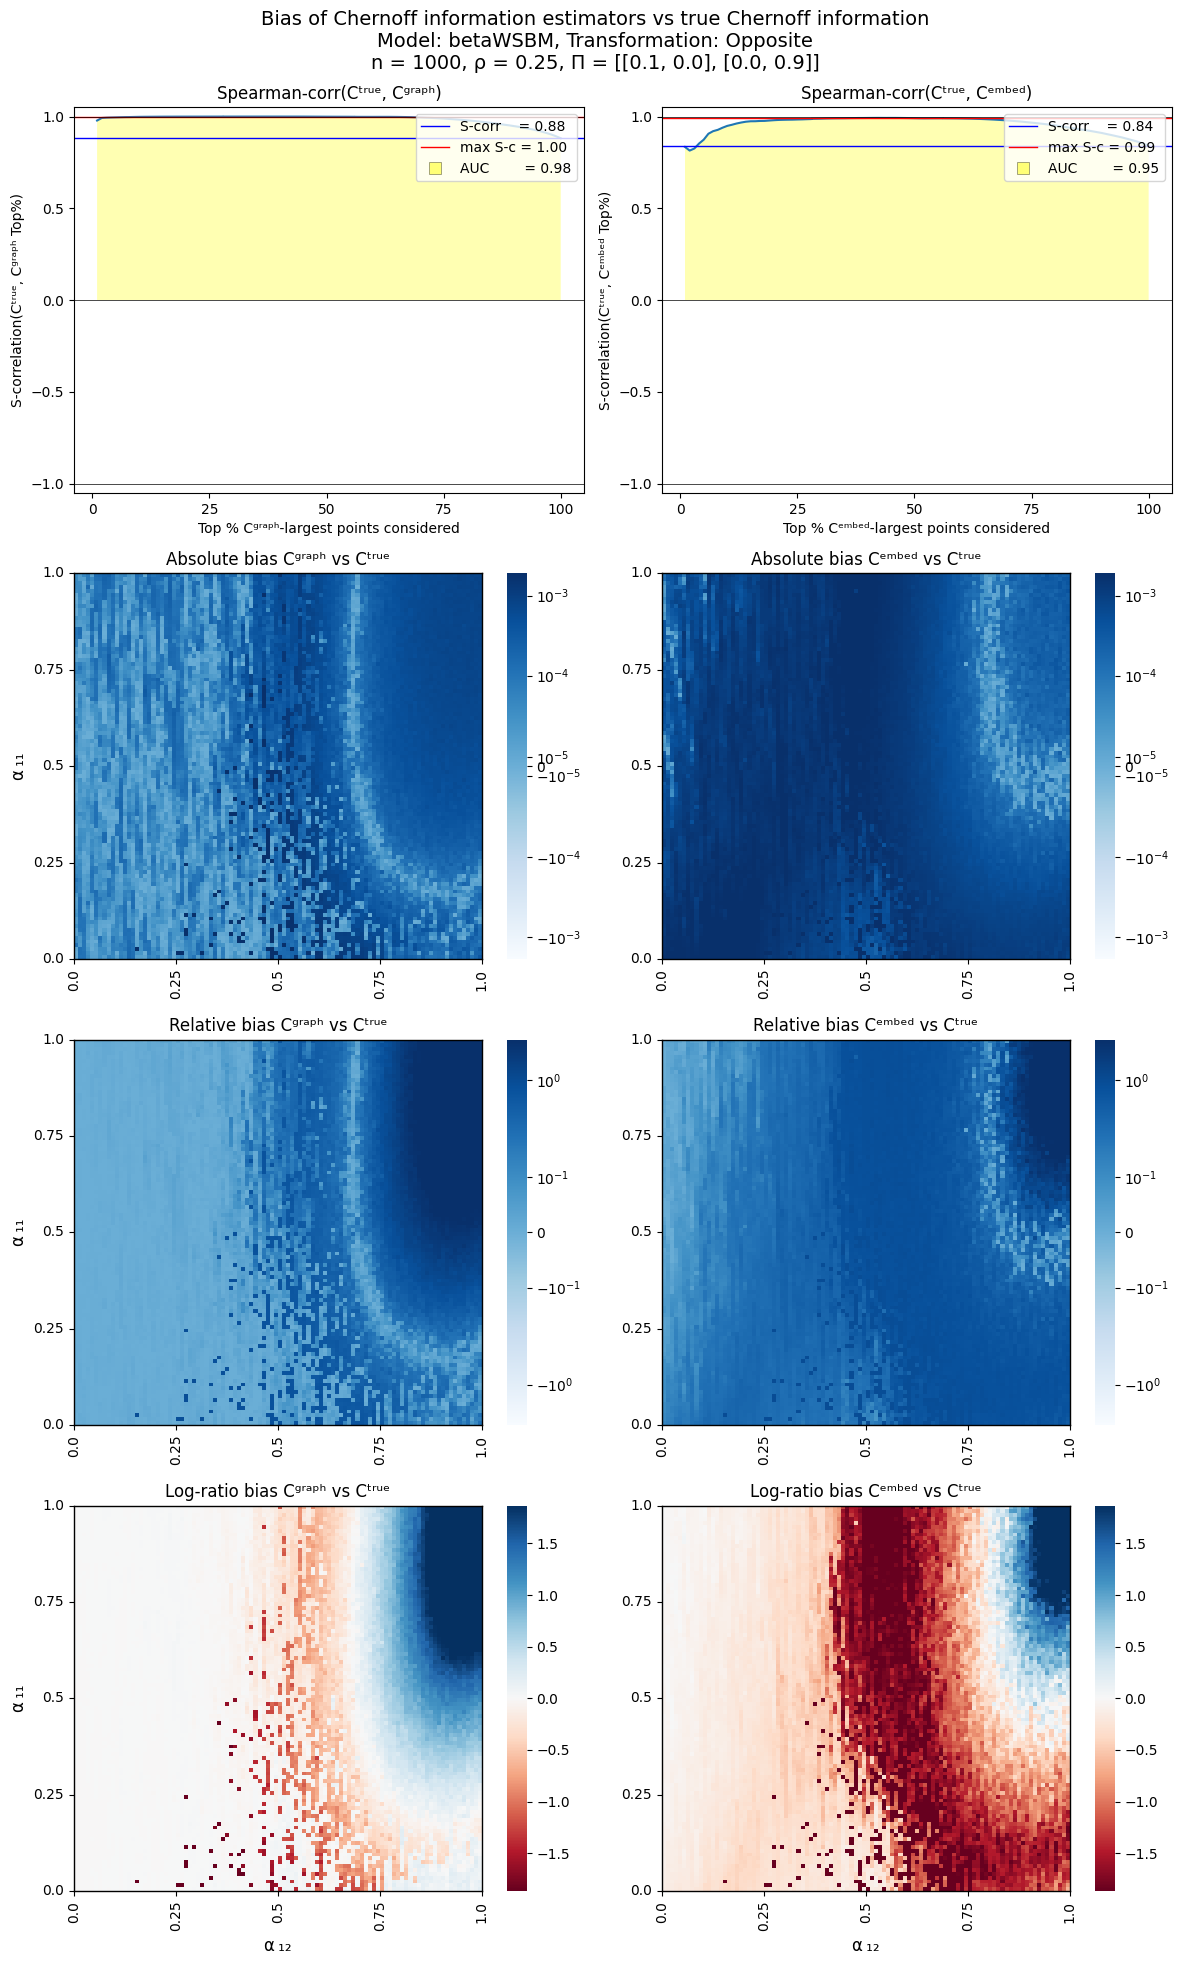

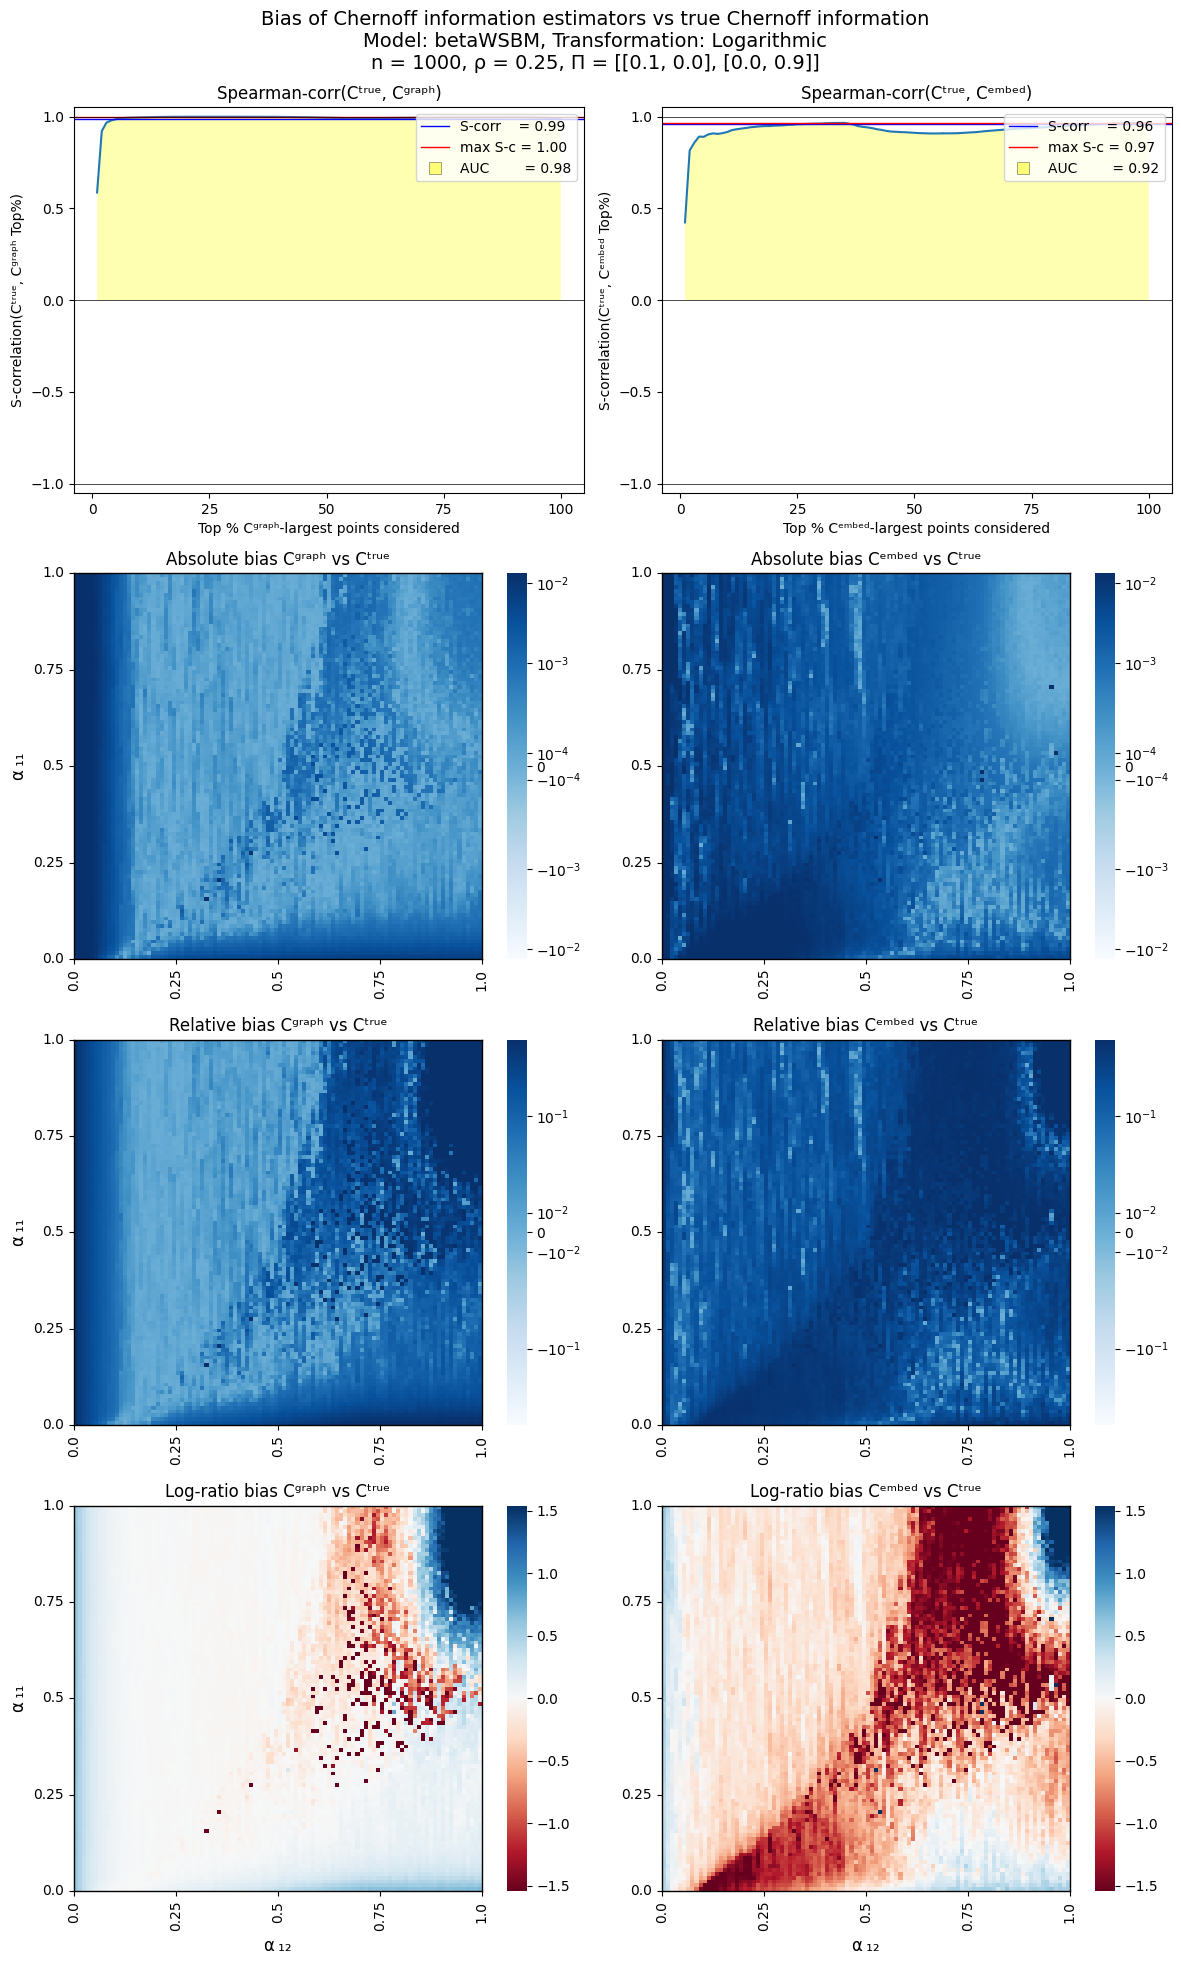

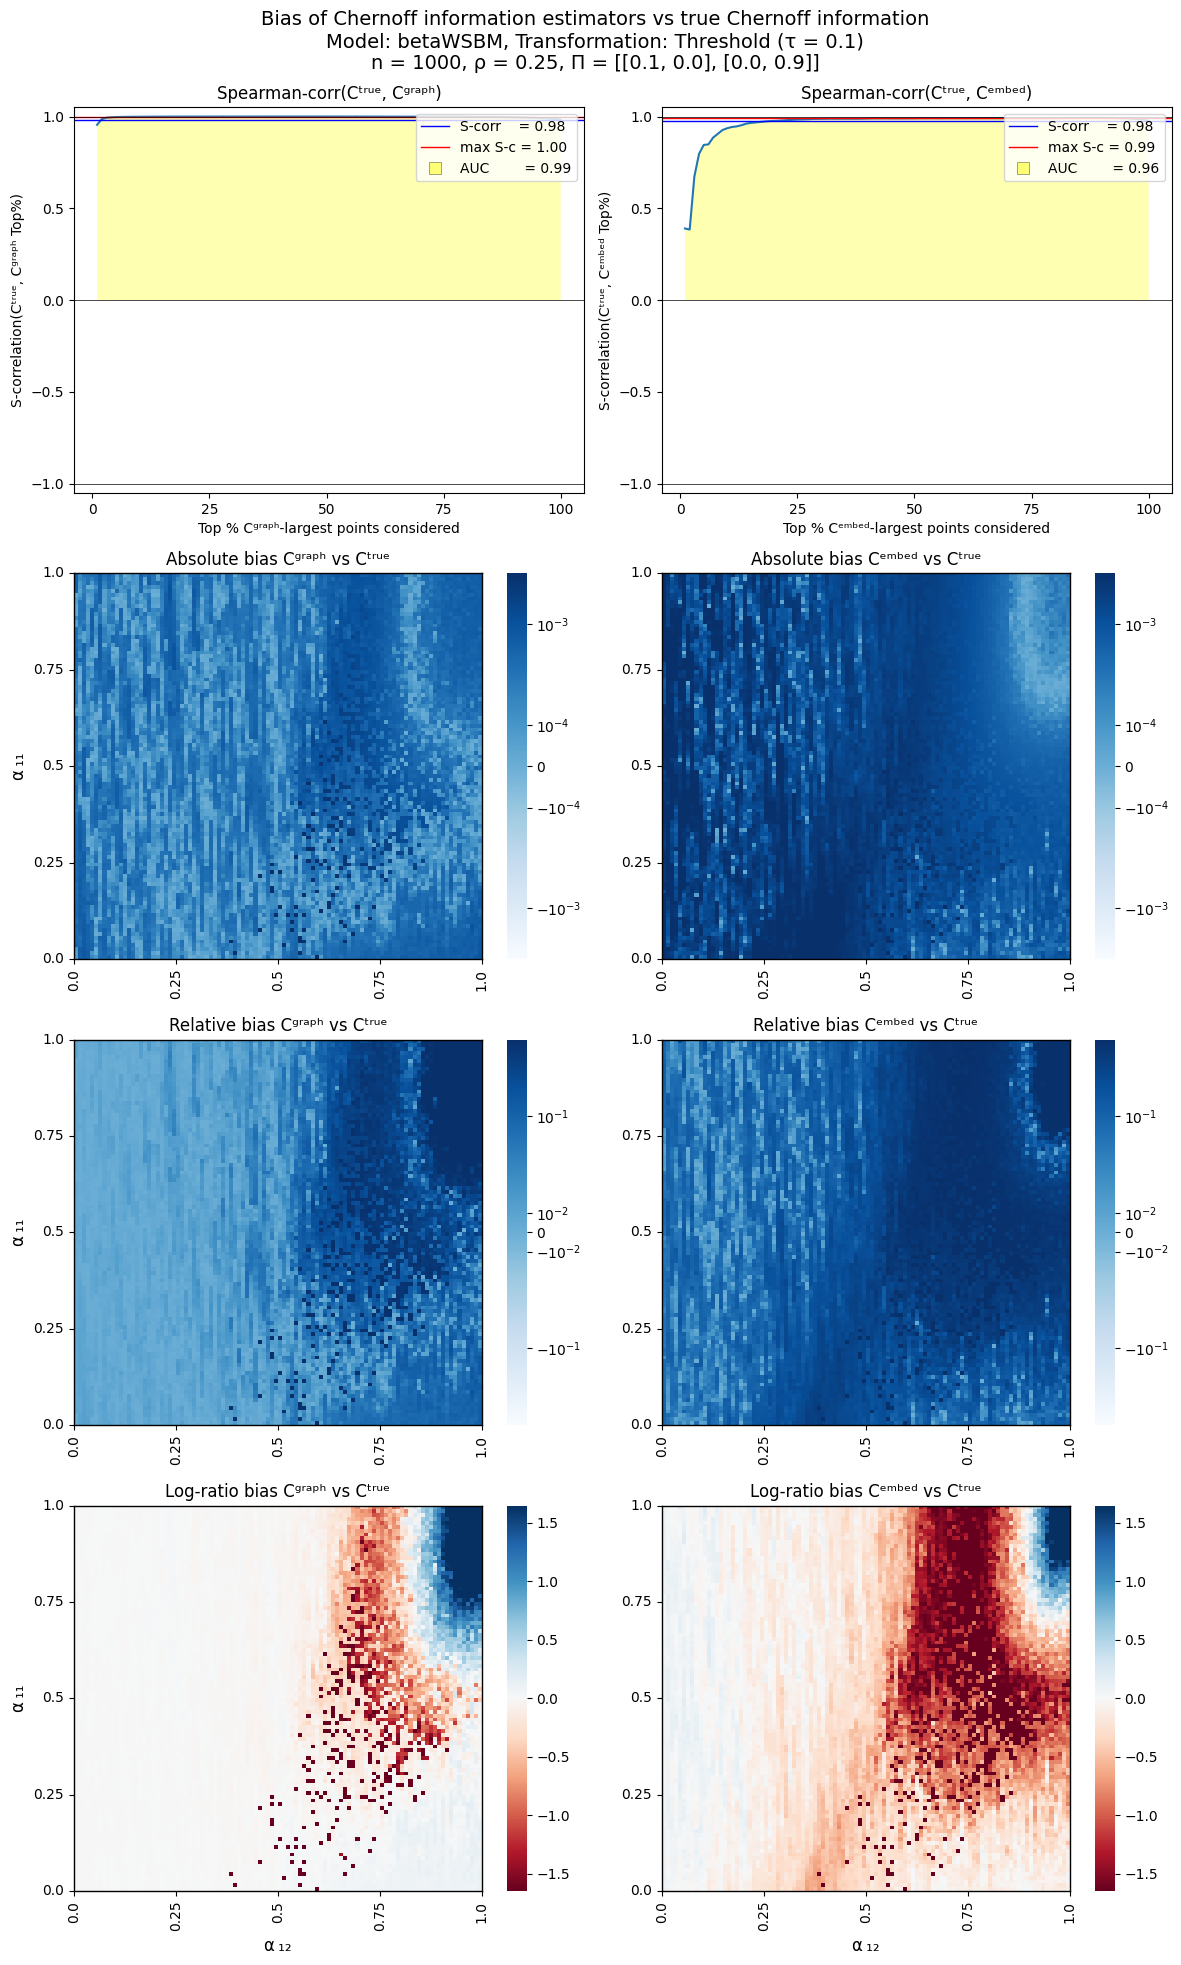

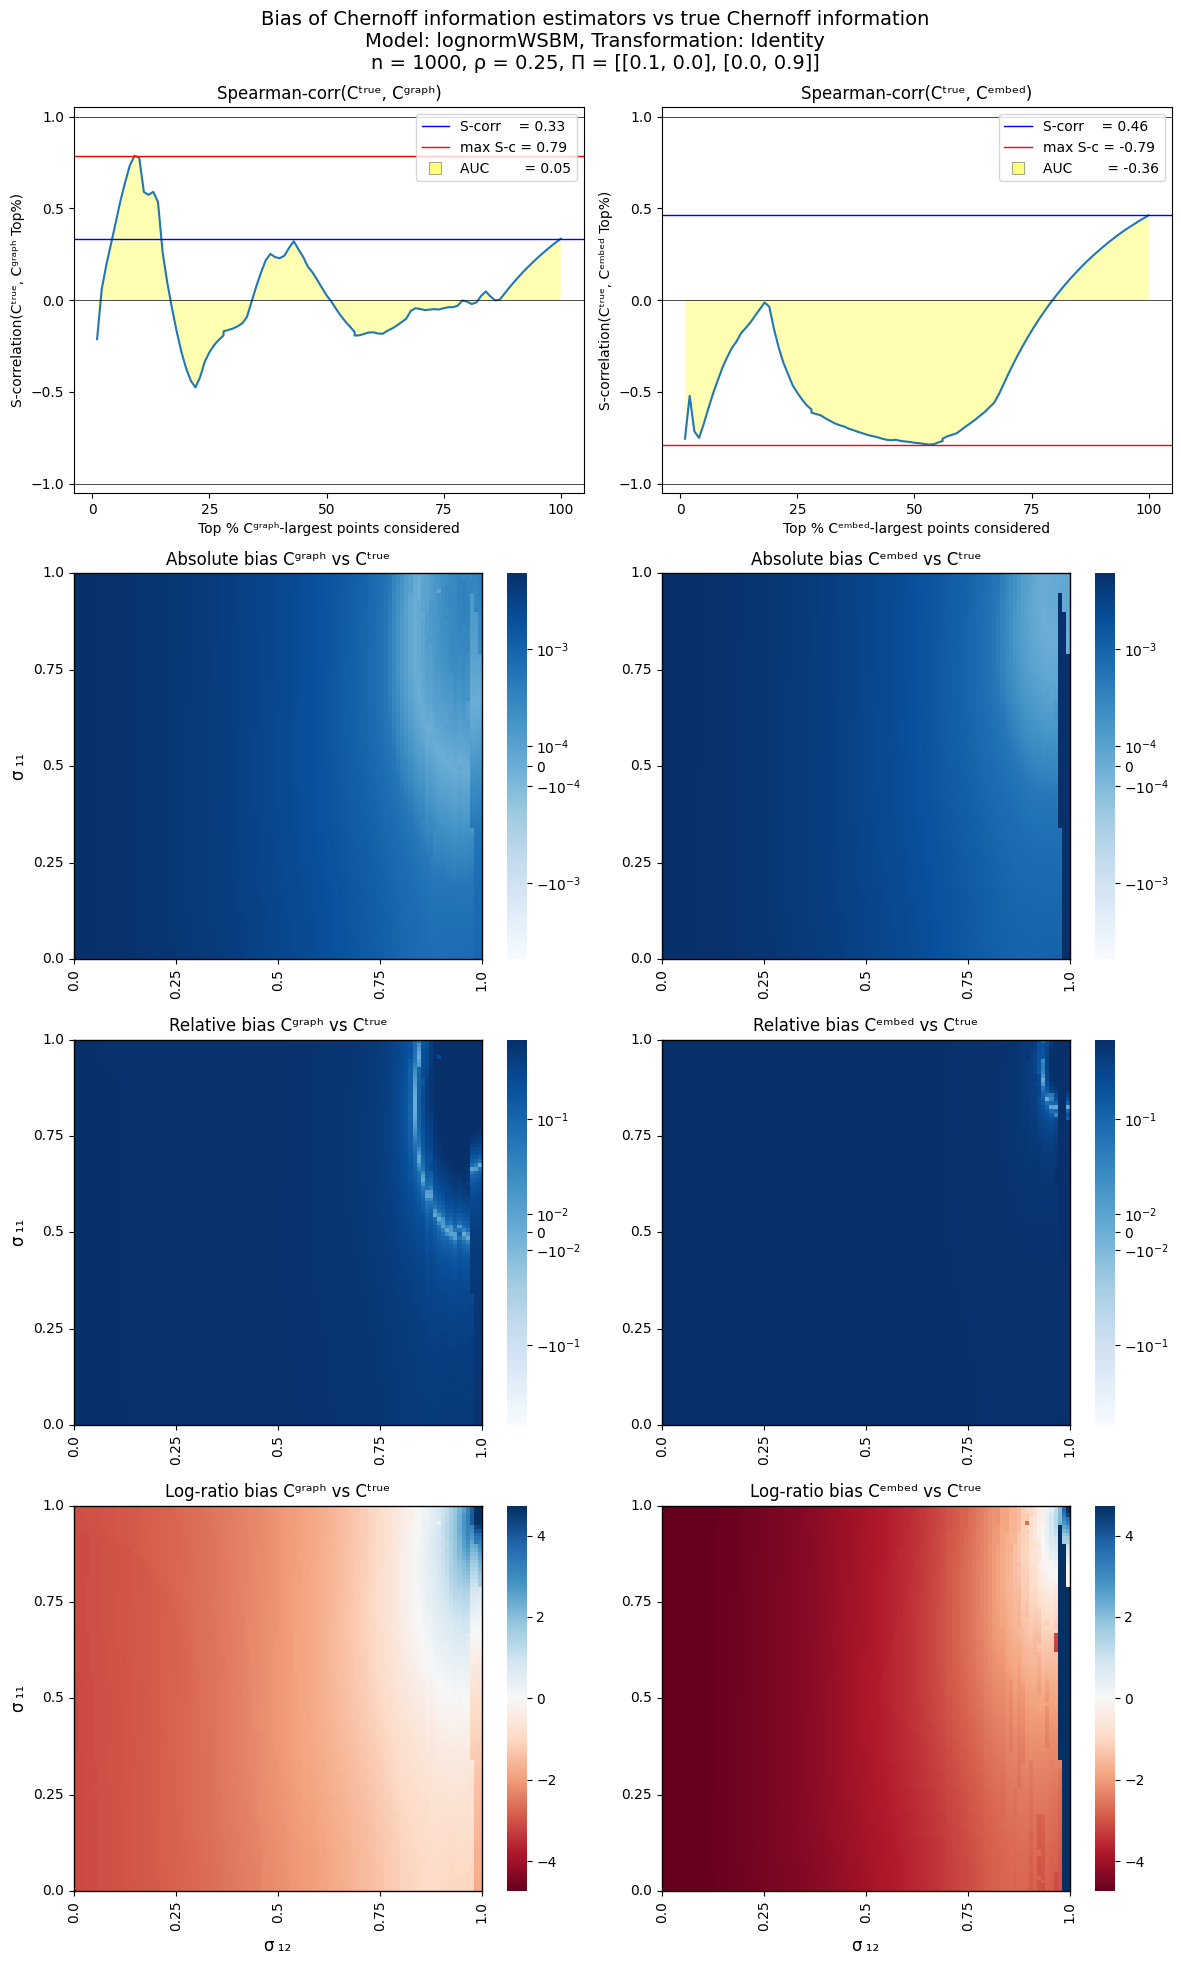

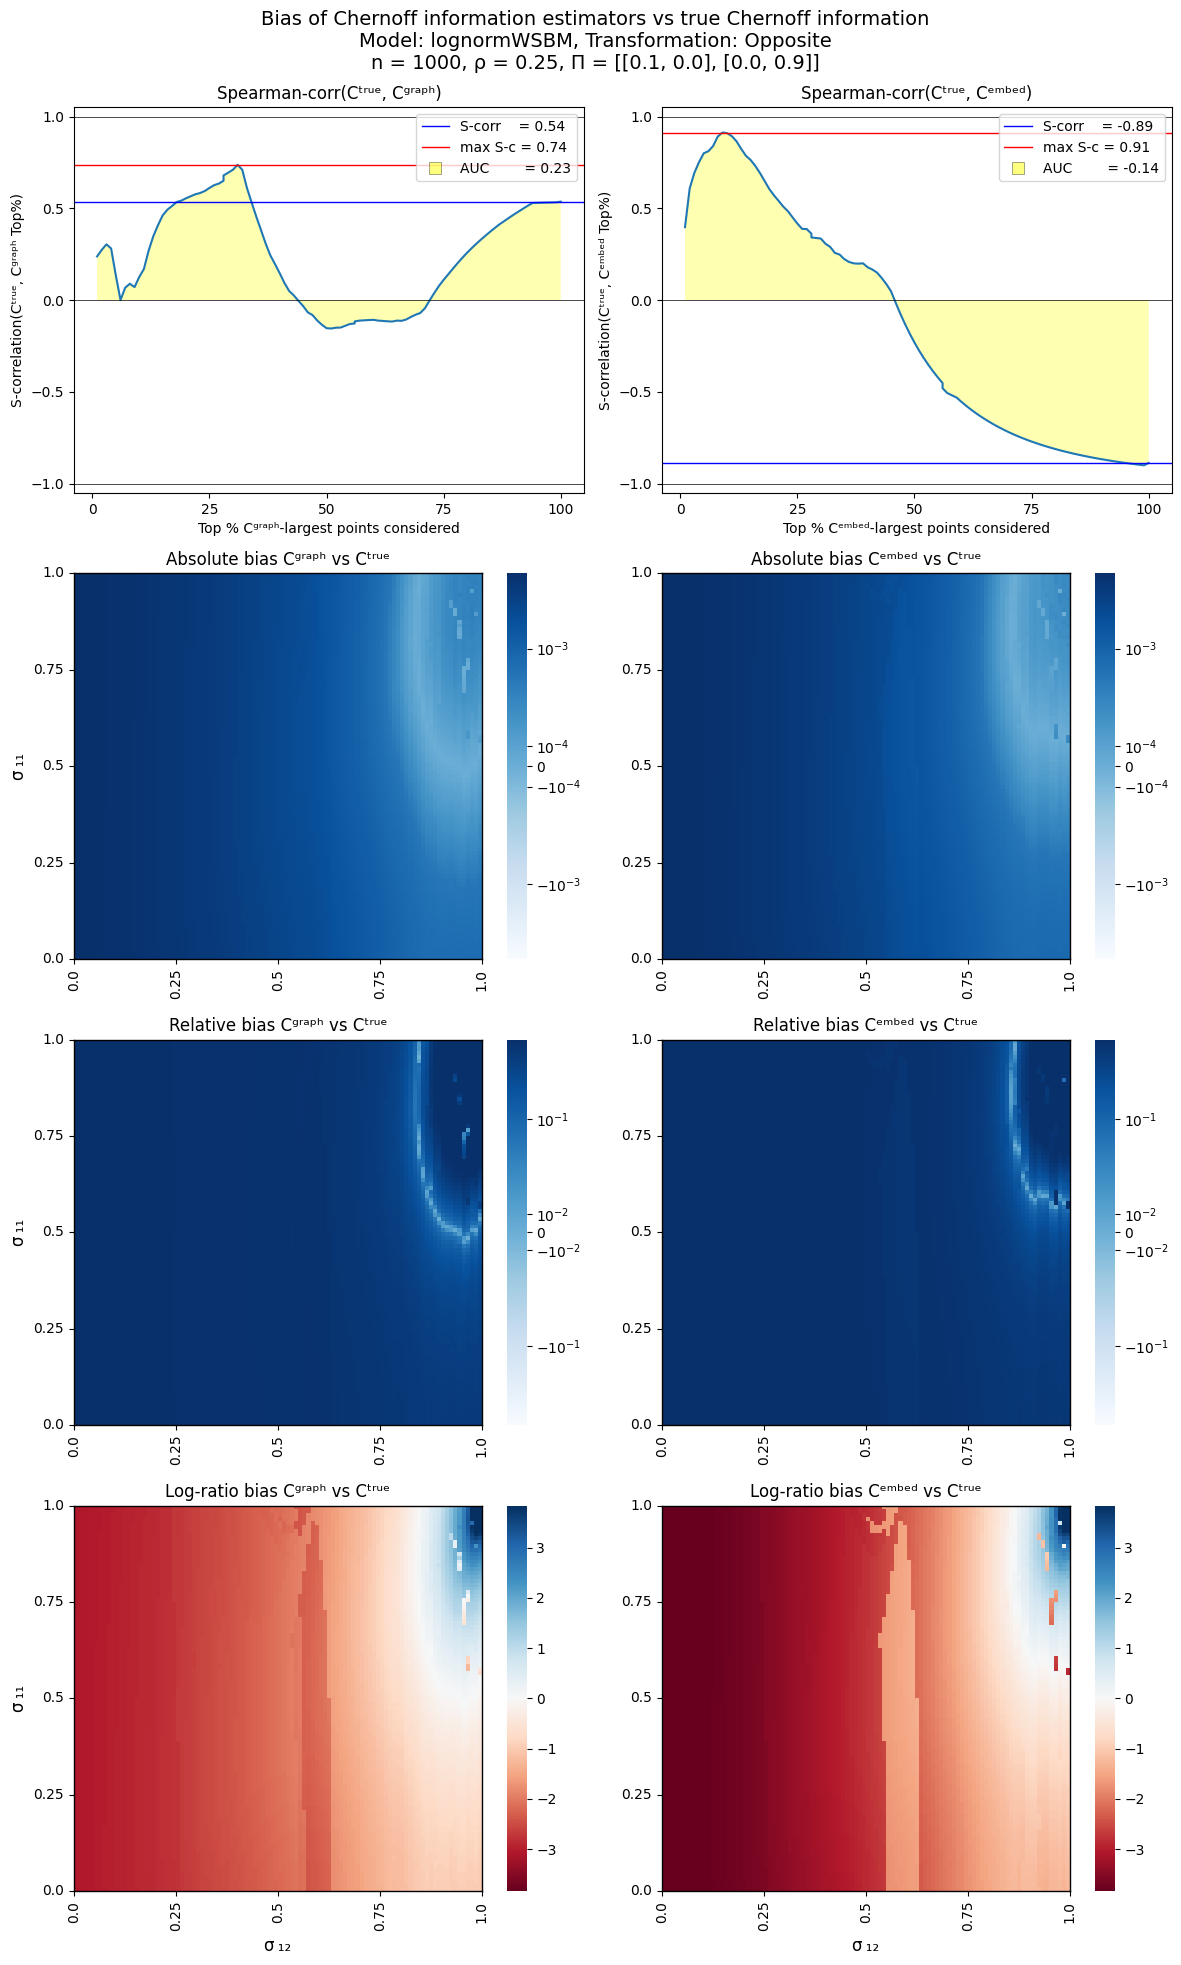

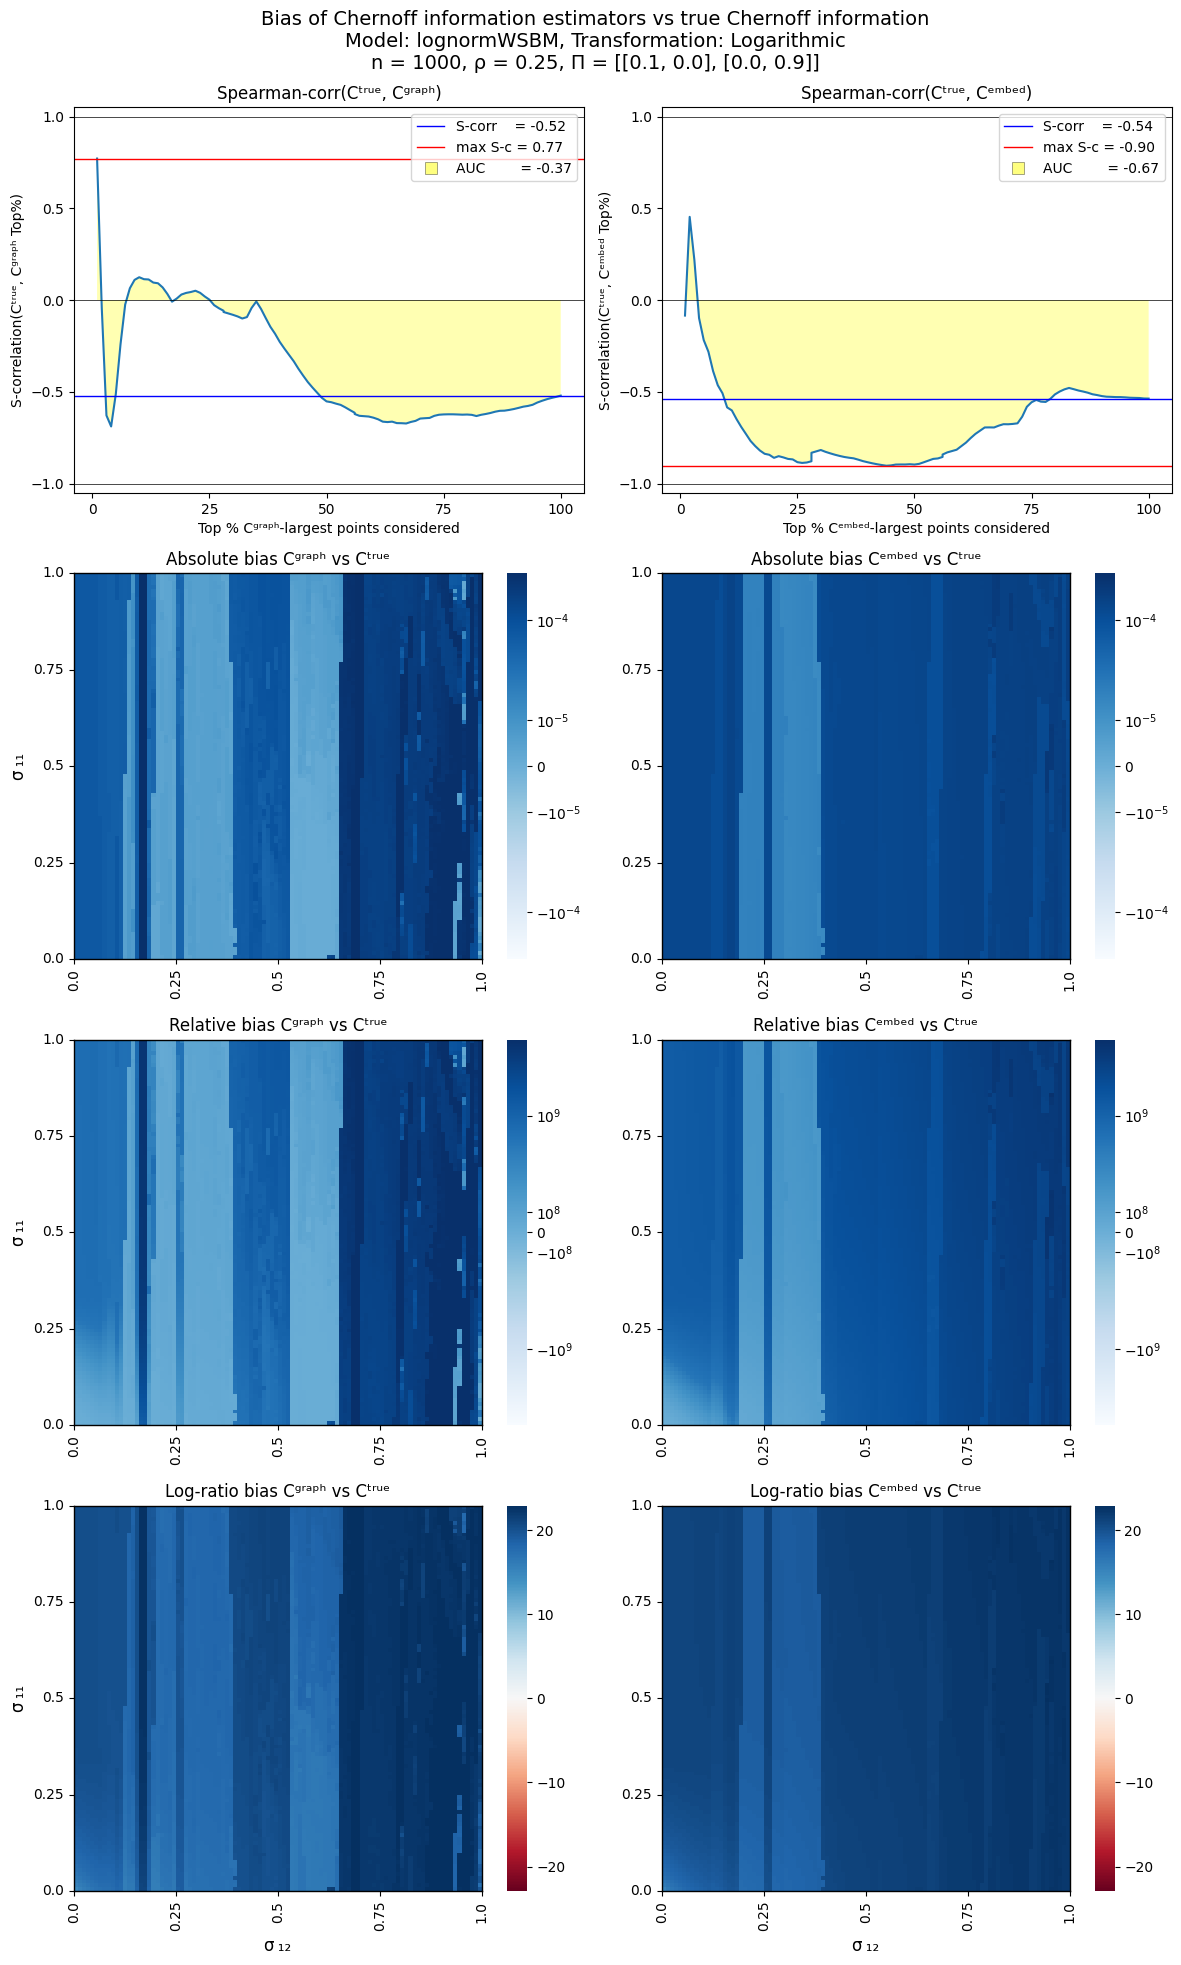

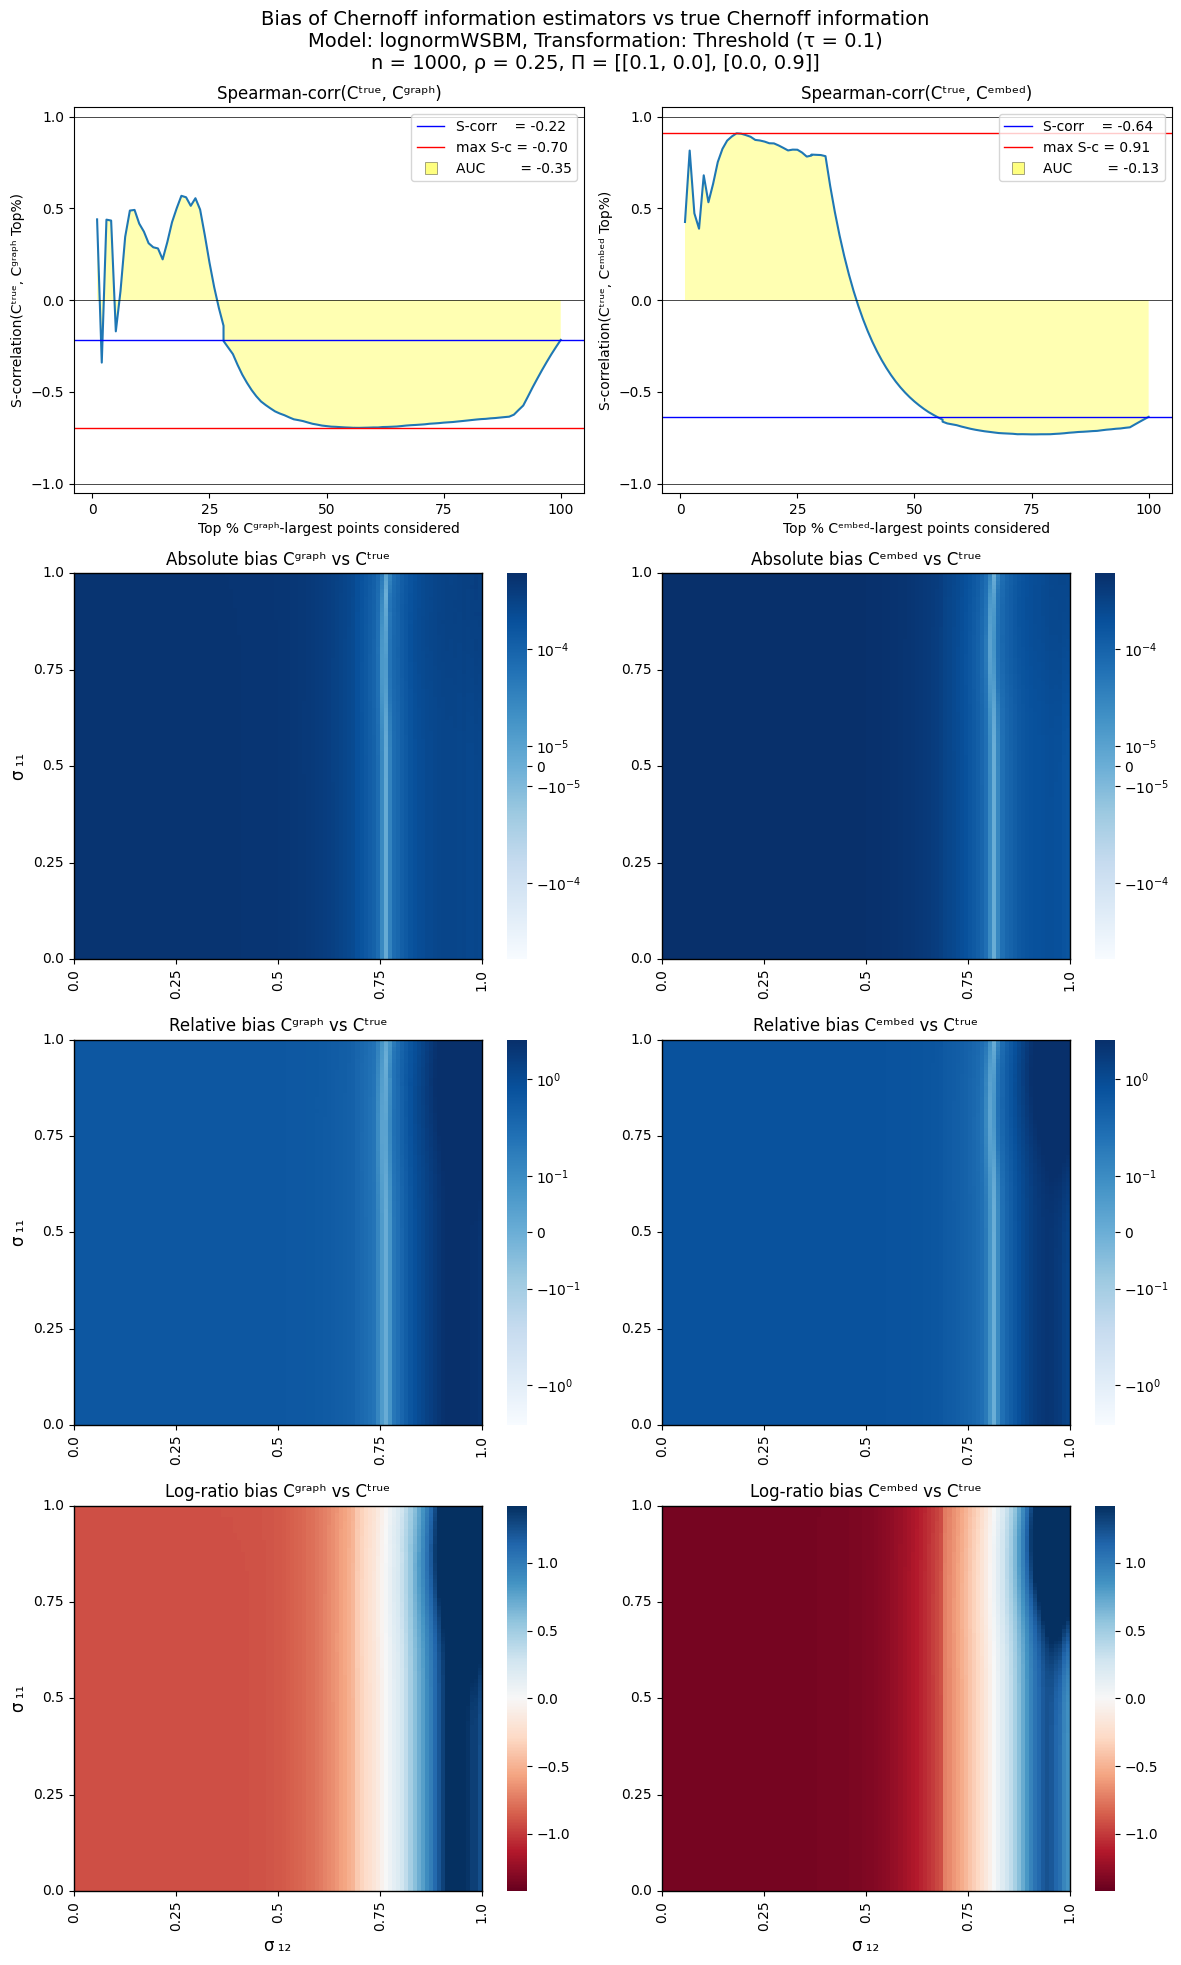

In [ ]:
# Prendre moins de place première ligne

for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics[(rho, pi, model)]
	for t in TRANSFORMS:
		m = metrics[(rho, pi, model)][t]
		plot_bias_heatmap(rho, pi, model, t, m, log = True)

In [ ]:
# Rand-Best Transform
# Comparison Rand-Best Transform regions? => Area(Regret>0)
#     Mettre en évidence limite avec ligne noire region où Regret > 0
#	  Avg(Regret[Regret>0])

# Rand moyen, Regret moyen pour Best transform overall
# Puis découpage en 2 régions (Regret > 0 et Regret = 0) et Rand moyen et Regret moyen

# Average(Area C-estim-Best Transform) over 8 graphs (TreeMap)
# Pour chaque Transform élue Best Transform
#	  - Rand moyen + Regret moyen
#     Puis découpage en 2 régions (Regret > 0 et Regret = 0) et Rand moyen et Regret moyen

# Average(Area Rand-Best Transform) over 8 graphs (TreeMap)
#     Rand moyen pour chaque Best transform

# Average(Rand) over 8 graphs for 4 transforms + Best

for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics[(rho, pi, model)]
	plot_best_transform_heatmaps(rho, pi, model, m)

NameError: name 'metrics' is not defined

In [ ]:
def plot_best_transform_lines(rho, pi, model, metrics, param, n=n):
    """
    Affiche deux graphiques (lignes) pour les métriques Rand.
    
    Pour chaque ligne ('C_graph-Best Transform' et 'C_embed-Best Transform'):
      - L'axe des x correspond au paramètre (varie de 0 à 1).
      - L'axe des y correspond à la métrique Rand.
      - Pour chaque transformation (contenue dans TRANSFORMS), on trace sa courbe Rand et on calcule son
        "head ratio" (la proportion de temps où la transformation atteint la meilleure valeur de Rand, égalités admises).
      - On extrait également la courbe Rand de la Best Transform (selon l'estimateur C), notée y_estC.
      - On calcule pour y_estC le head ratio, le regret (ratio de temps où y_estC < best possible Rand) 
        et l'aire de regret (intégrale de la différence entre la meilleure Rand et y_estC).
      - La courbe y_estC est tracée en noir avec une épaisseur importante et l'aire entre y_estC et la meilleure Rand
        (max_rand) est remplie en violet (alpha=0.3).
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import Patch
    from matplotlib import colors
    
    # On suppose que les variables globales TRANSFORMS, TRANSFORMS_CMAP et METRICS_ID_COSMETIC_MAP existent.
    rows = ['C_graph-Best Transform', 'C_embed-Best Transform']
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    fig.set_dpi(300)
    fig.suptitle(
        f"Best‑Transform Rand Metrics on Model: {model.__name__}\n" + model_str(n, rho, pi),
        fontsize=14
    )
    
    for ax, row in zip(axes, rows):
        # La courbe de la Best Transform (selon l'estimateur C)
        y_estC = metrics[row]['Rand']
        N = len(y_estC)
        x = np.linspace(0.01, 1, N)
        
        # Récupération des courbes Rand pour toutes les transformations
        all_transforms = np.array([metrics[t]['Rand'] for t in TRANSFORMS])
        # La meilleure valeur de Rand pour chaque point (la référence)
        max_rand = np.max(all_transforms, axis=0)
        
        # Tracé des courbes pour chaque transformation
        for t in TRANSFORMS:
            y_t = metrics[t]['Rand']
            # Calcul du head ratio : proportion de points où y_t atteint (à tolérance près) max_rand
            head_ratio = np.mean(np.isclose(y_t, max_rand, atol=1e-8))
            mean_rand = np.mean(y_t)
            ax.plot(
                x, y_t,
                label=f"{t.id}: Avg Rand = {mean_rand:.2f} - Head Ratio = {head_ratio:.2f}",
                color=TRANSFORMS_CMAP[t],
                linewidth=2
            )
        
        # Calculs pour la Best Transform (w.r.t l'estimateur C)
        head_ratio_estC = np.mean(np.isclose(y_estC, max_rand, atol=1e-8))
        mean_estC = np.mean(y_estC)
        # Regret : ratio de temps où y_estC est strictement inférieure à max_rand
        regret_ratio = np.mean(~np.isclose(y_estC, max_rand, atol=1e-8))
        # Aire de regret : intégrale de la différence positive entre max_rand et y_estC
        regret_area = np.trapz(np.maximum(0, max_rand - y_estC), x)
        
        # Tracé de la courbe de la Best Transform en noir
        ax.plot(
            x, y_estC,
            label=(f"Best Transform (w.r.t C): Avg Rand = {mean_estC:.2f} - Head Ratio = {head_ratio_estC:.2f}\n"
                   f"Regret Ratio = {regret_ratio:.2f} - Regret Area = {regret_area:.2f}"),
            color='black',
            linewidth=6,
            alpha = 0.3
        )
        
        # Remplissage de l'aire entre y_estC et la meilleure Rand
        ax.fill_between(x, y_estC, max_rand, color='purple', alpha=0.3)
        
        # Personnalisation du graphique
        title = f"{METRICS_ID_COSMETIC_MAP[row[:7]]}-Best Transform: Rand"
        ax.set_title(title, fontsize=12)
        ax.set_xlabel(f'{model.param_name}{sub(" " + param)}', fontsize=12)
        ax.set_ylabel("Rand", fontsize=12)
        ax.set_xticks(np.linspace(0, 1, 5))
        ax.legend(loc="upper left", handlelength=2, handleheight=2, fontsize=9)
    
    plt.tight_layout()
    plt.show()


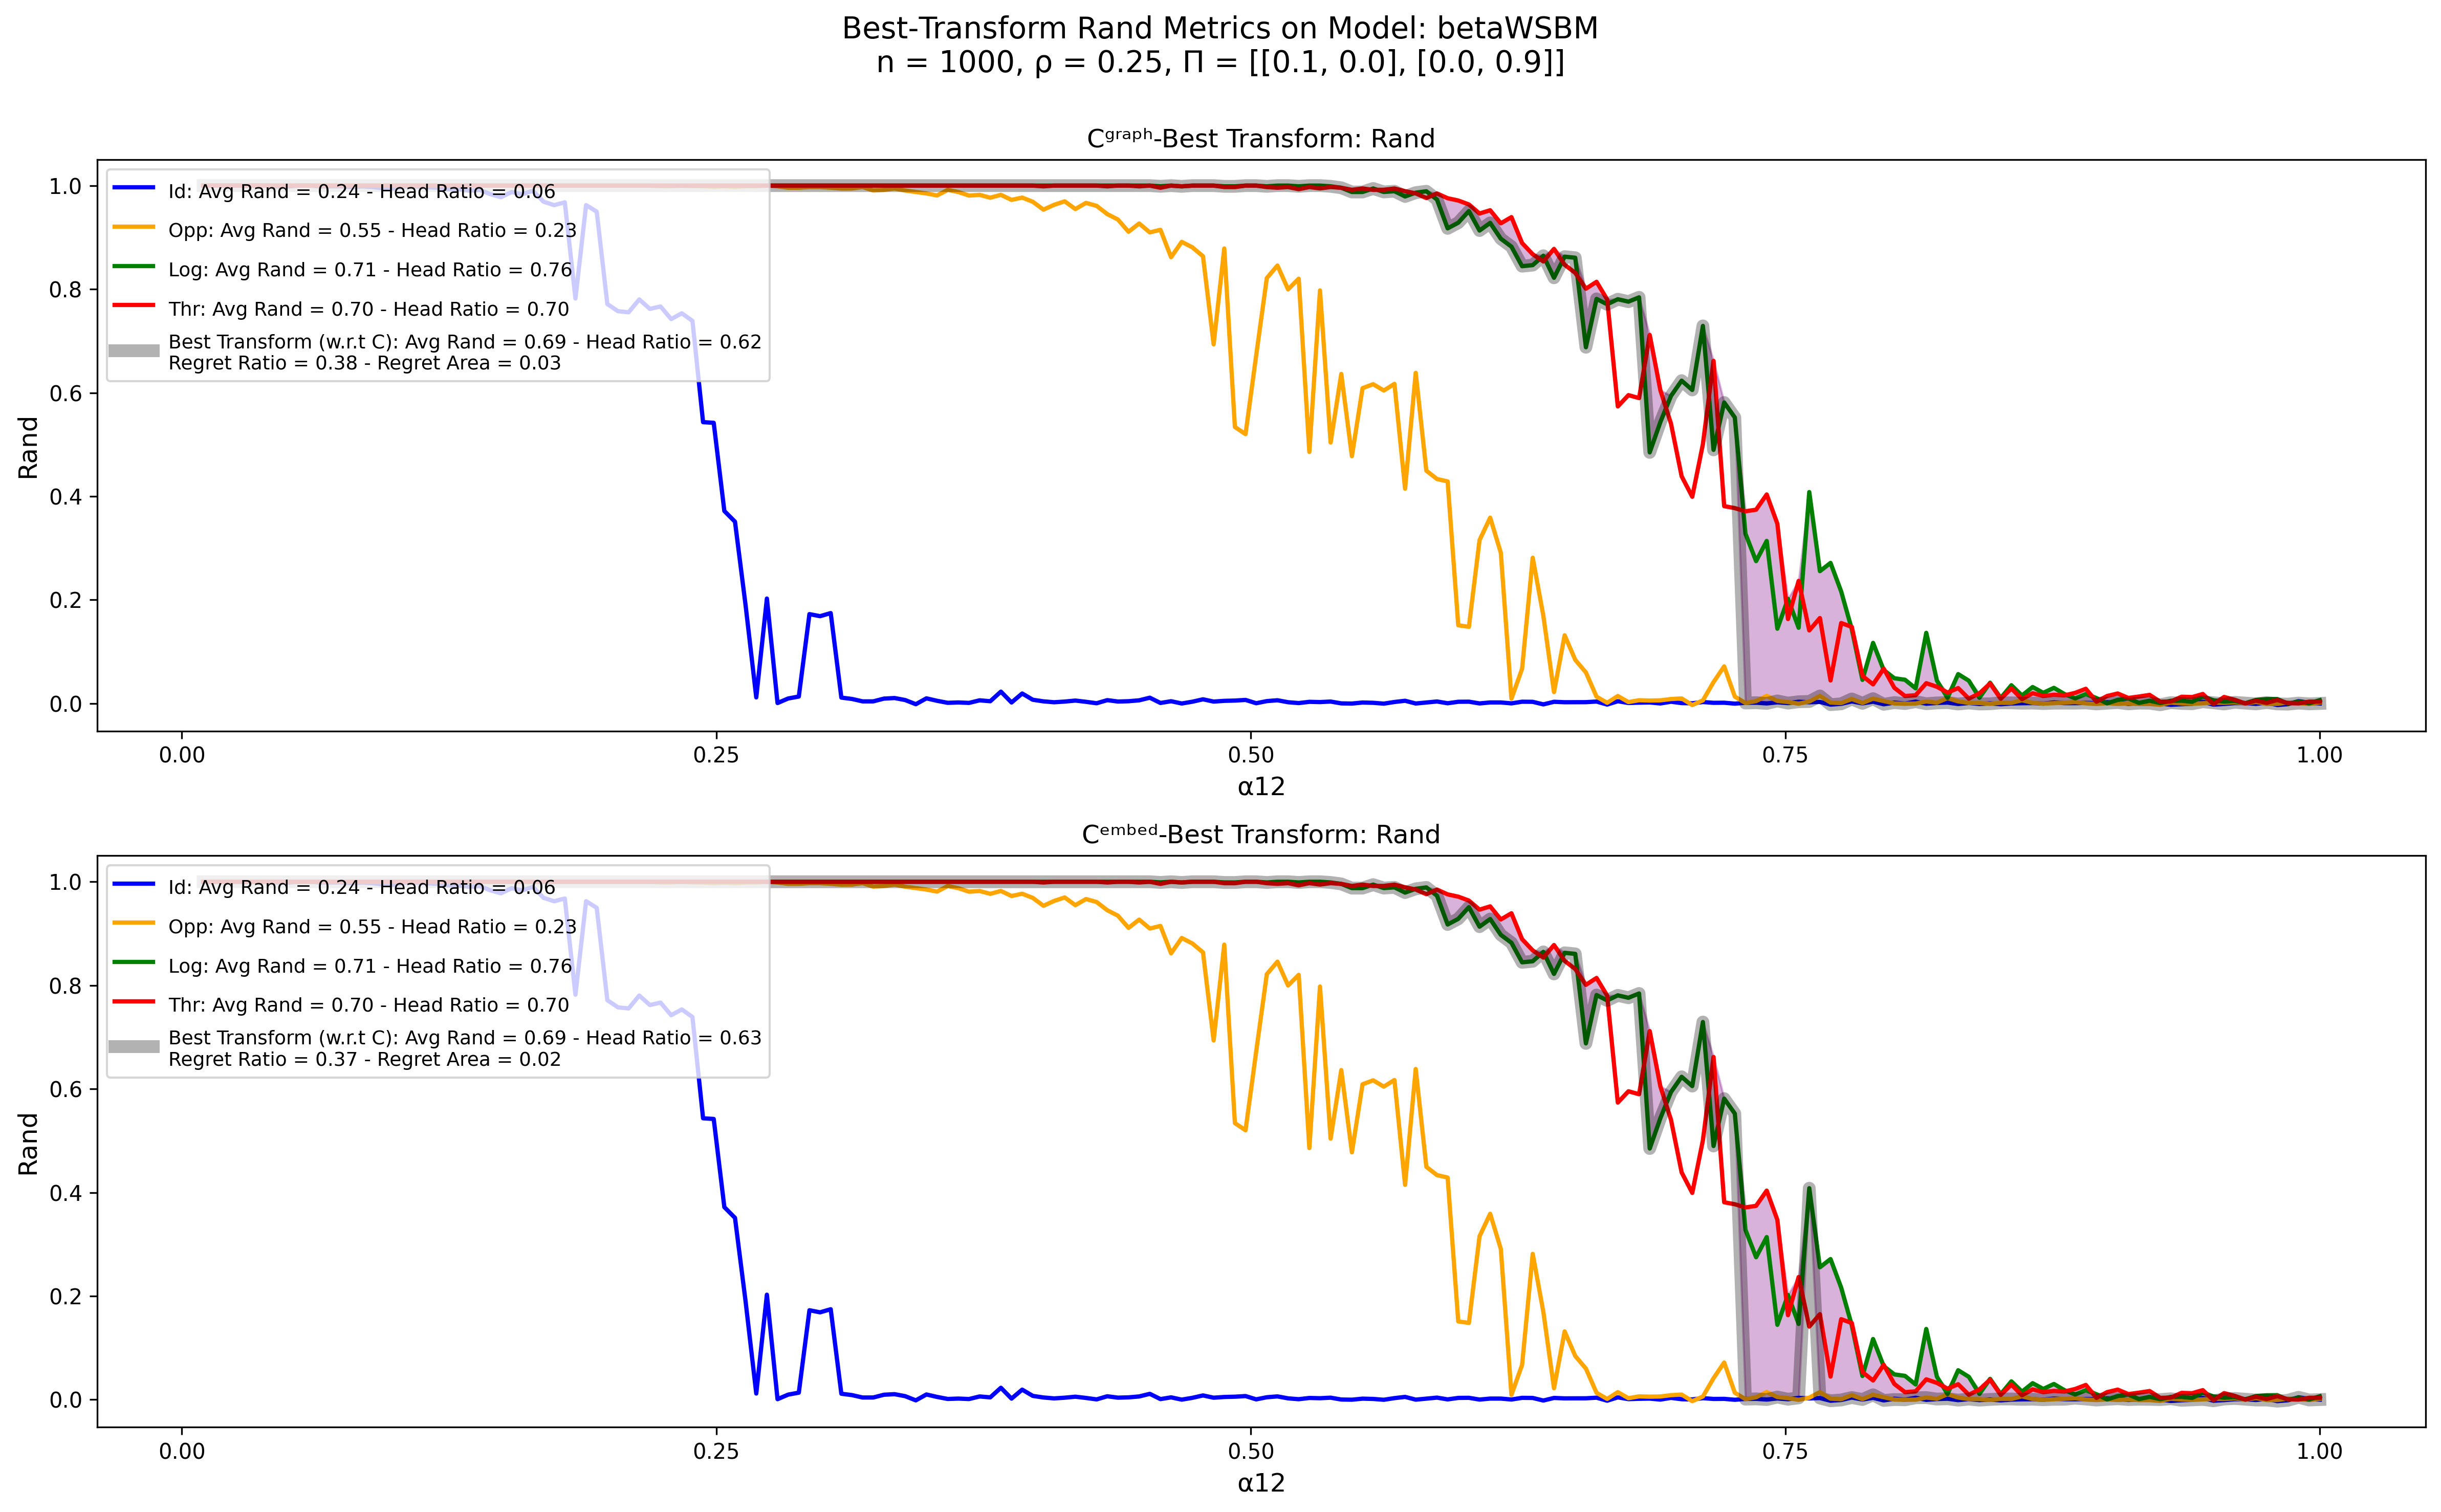

In [14]:
#RHOS_PIS_MODELS = list(product(RHOS, PIS, MODELS))

for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics_l[(rho, pi, model)]
	plot_best_transform_lines(rho, pi, model, m, '12')